### Problem Statement:

Zillow is asking you to predict the log-error between their Zestimate and the actual sale price, given all the features of a home. The log error is defined as:

logerror = log(Zestimate) − log(SalePrice)- log(SalePrice)

and it is recorded in the transactions file train.csv.

"Zestimates" are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

In this data science project, we will develop a machine learning algorithm that makes predictions about the log-error described above.

### Importing Libraries & Loading Dataset:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns',None)

In [3]:
properties_2016 = pd.read_csv('../input/properties_2016.csv')
train_2016 = pd.read_csv('../input/train_2016_v2.csv')

### Shape of Datasets:

In [4]:
print('Shape of properties_2016: ', properties_2016.shape)
print('Shape of train_2016: ', train_2016.shape)

Shape of properties_2016:  (2985217, 58)
Shape of train_2016:  (90275, 3)


In [5]:
properties_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [6]:
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


### Feature	Description:
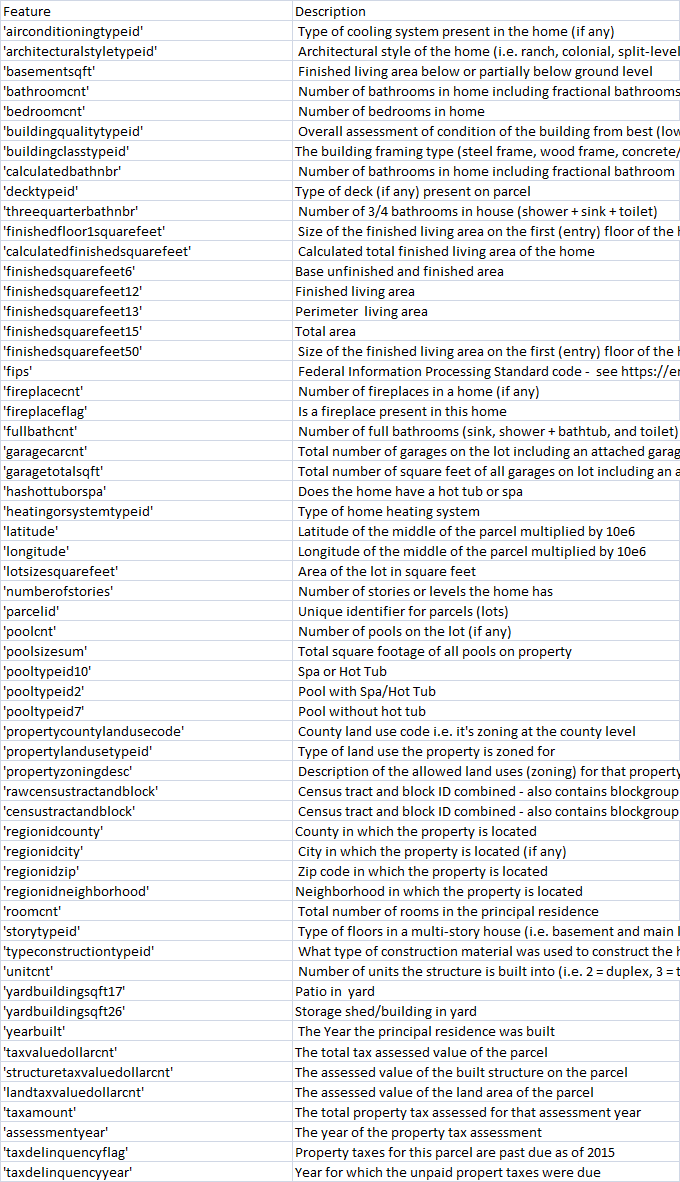

We see that parcelid is the unique identifier between the 2 tables. Hence we will perform a join of the 2 tables to form our complete datatset and then go ahead with other EDA techniques.

### Reforming Dataset:

In [7]:
final_df = properties_2016.copy()
final_df = final_df.merge(train_2016, how = 'inner', on = 'parcelid')
final_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [8]:
final_df.shape

(90275, 60)

The above reformed dataset contains 90275 rows and 60 columns/variables.

Let's analyse the dataset to identify the following:

* Missing values
* Numerical variables
* Distribution of the numerical variables
* Outliers
* Categorical variables
* Cardinality of the categorical variables
* Potential relationship between the variables and the target: SalePrice

In [9]:
#Create a copy of the dataset
zillow_df = final_df.copy()

### Dataset Information:

In [10]:
zillow_df.shape

(90275, 60)

In [11]:
zillow_df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [12]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

In [13]:
zillow_df.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+07,25218.0

### Missing values:

In [14]:
mis_val = [var for var in zillow_df.columns if zillow_df[var].isnull().sum()>0]

zillow_df[mis_val].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

### Relationship between missing values and log error:

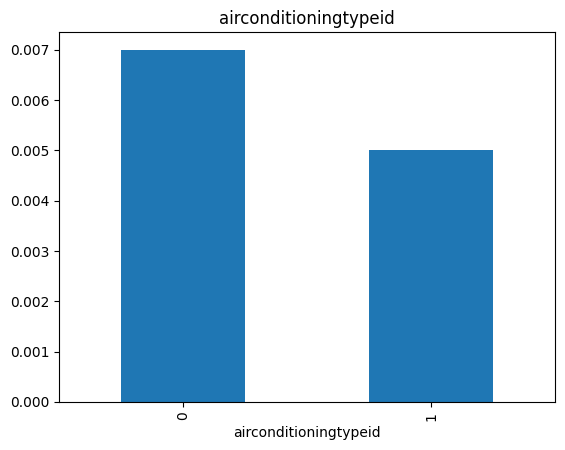

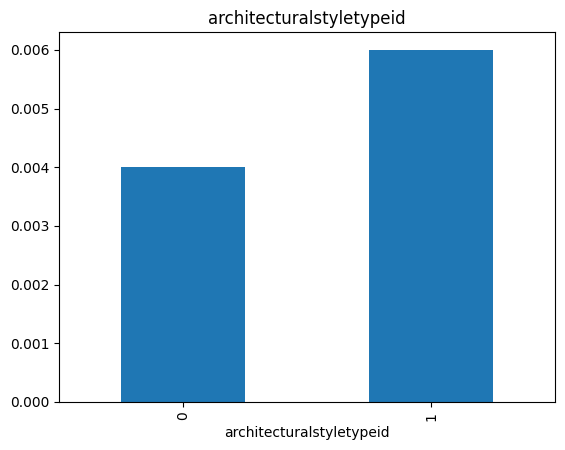

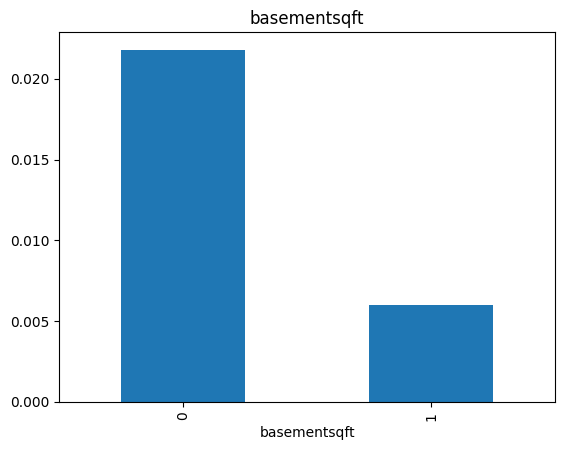

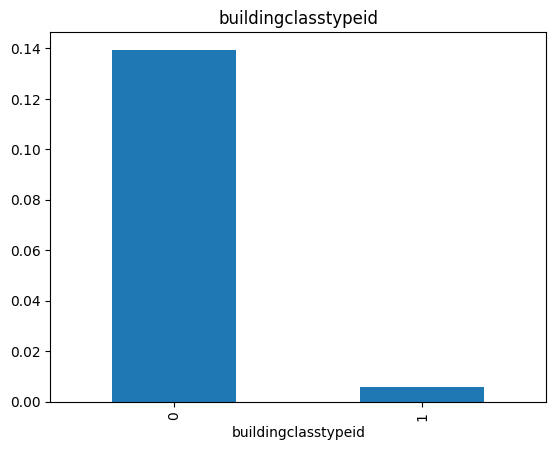

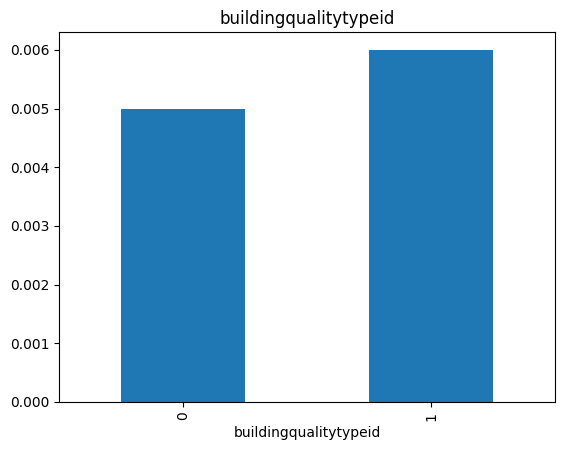

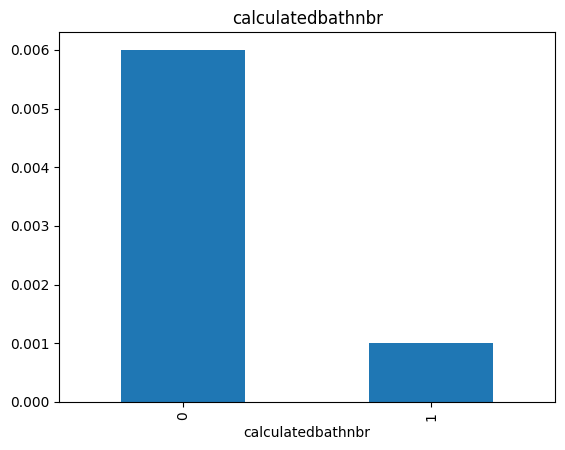

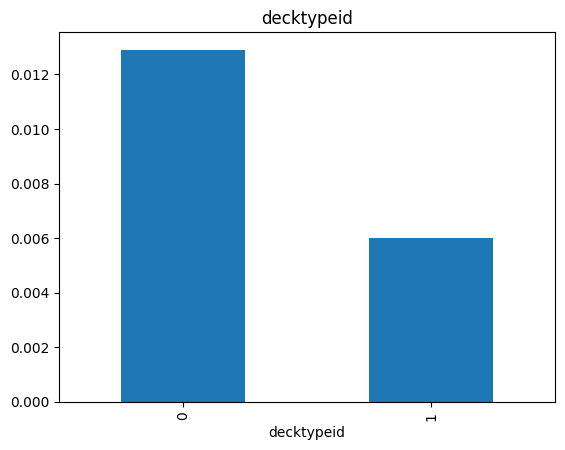

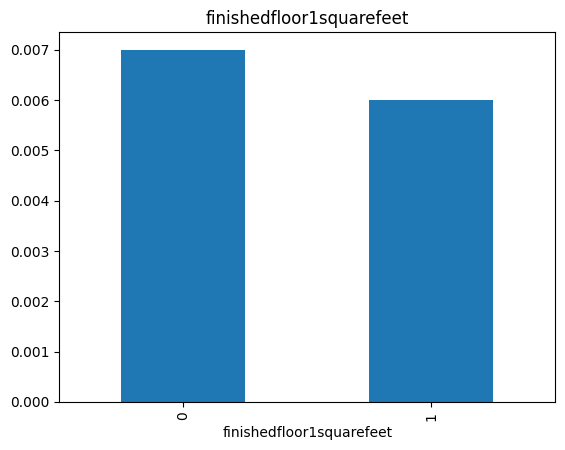

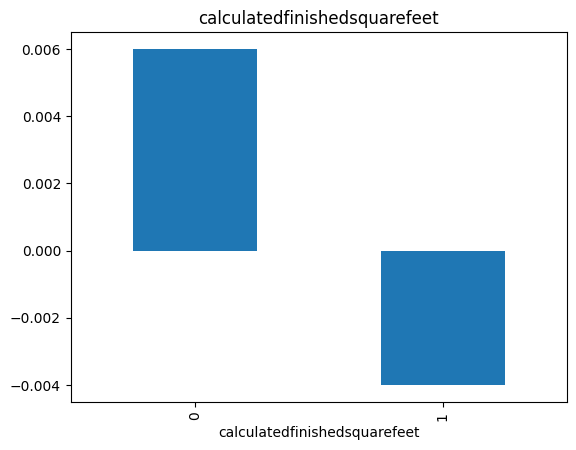

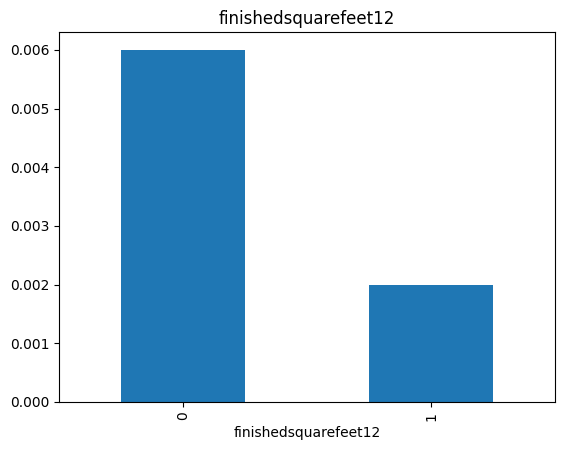

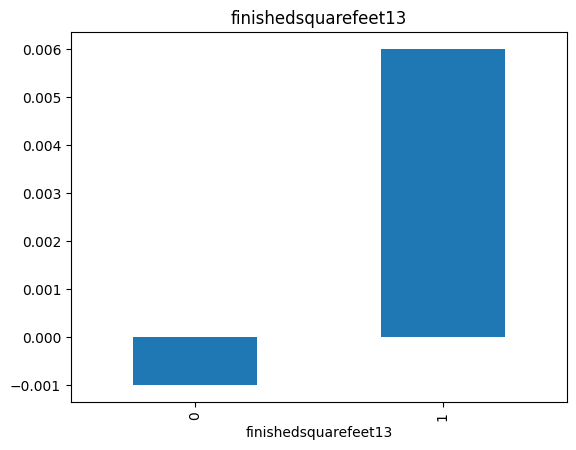

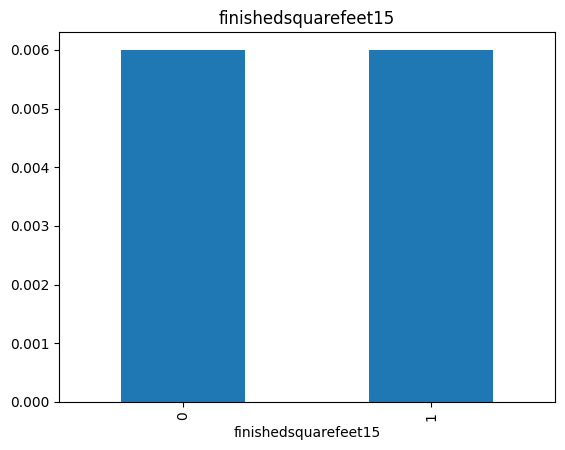

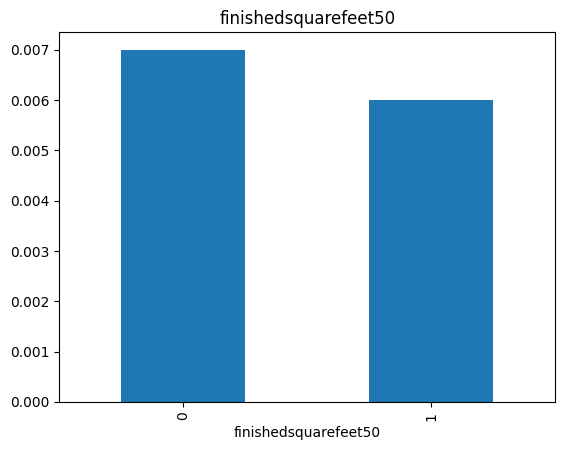

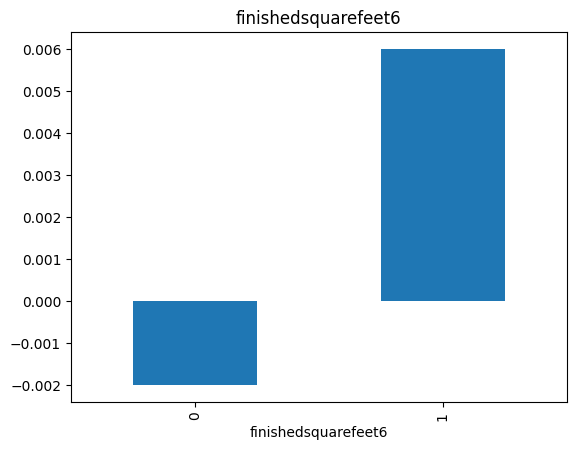

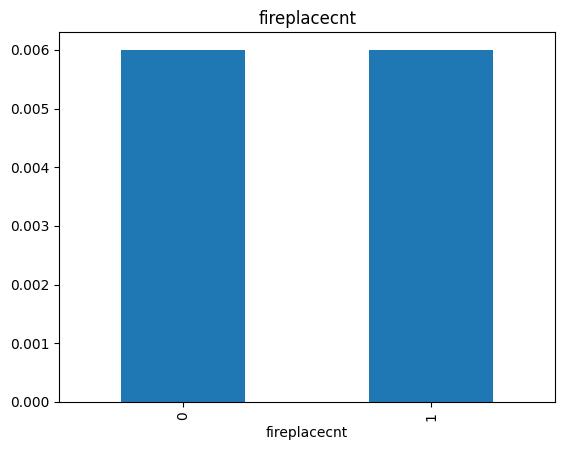

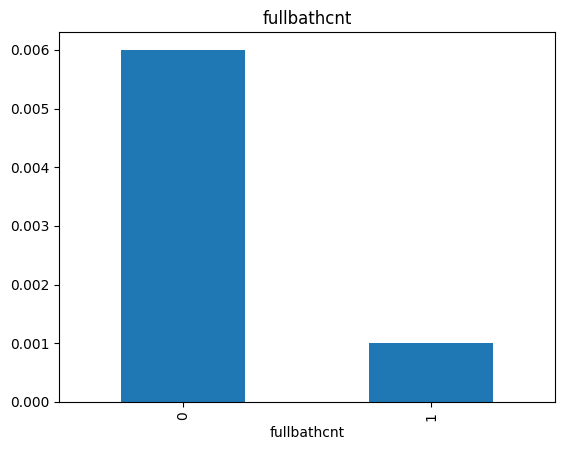

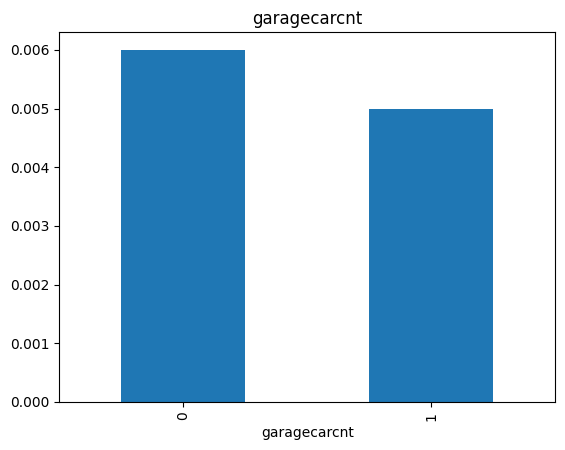

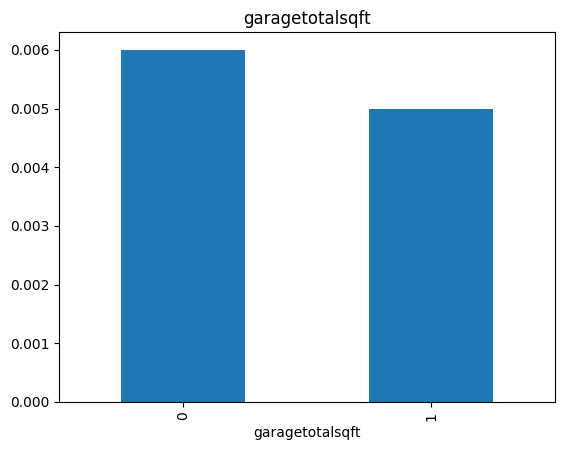

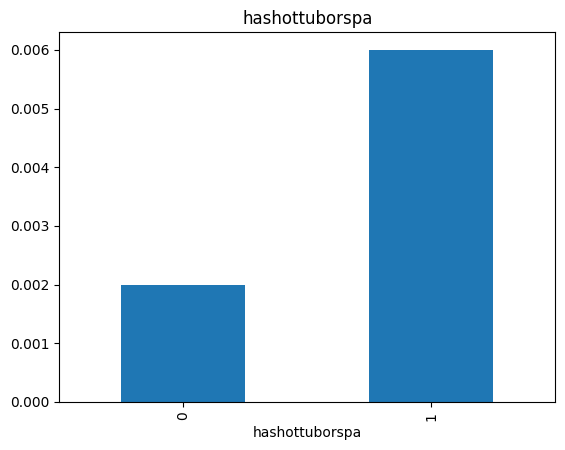

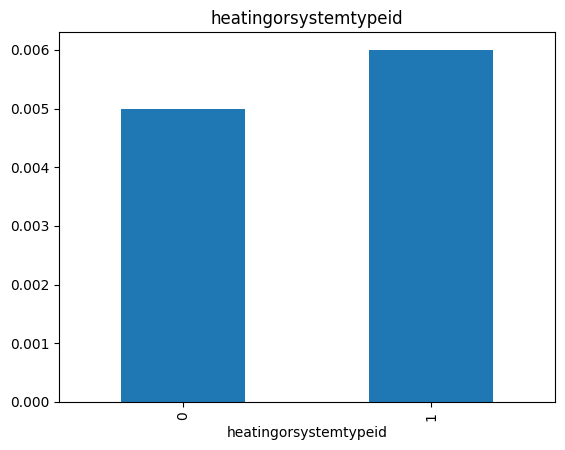

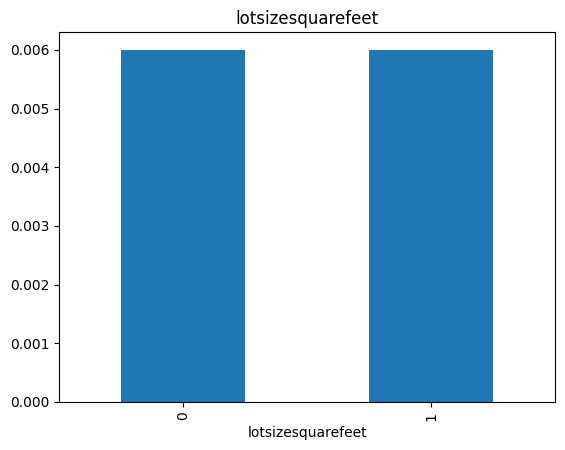

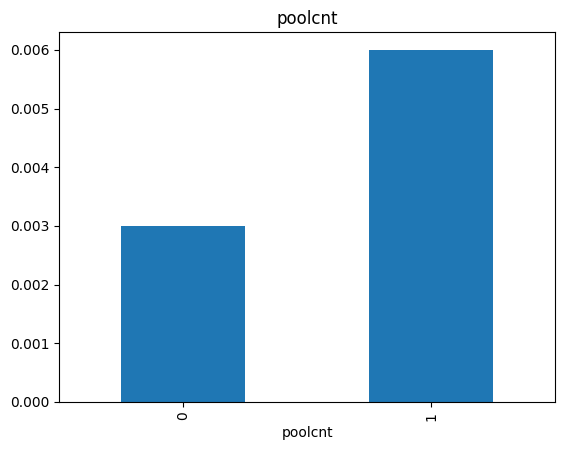

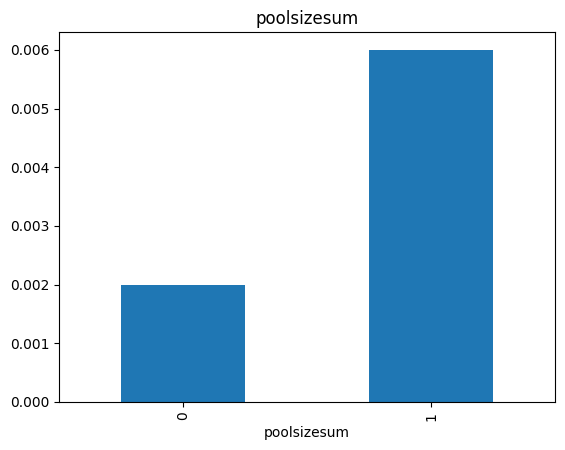

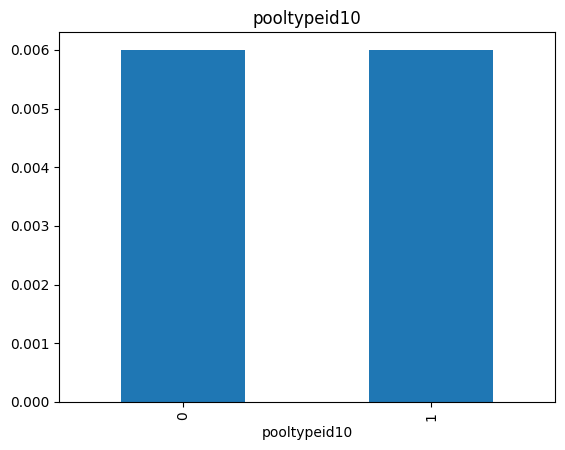

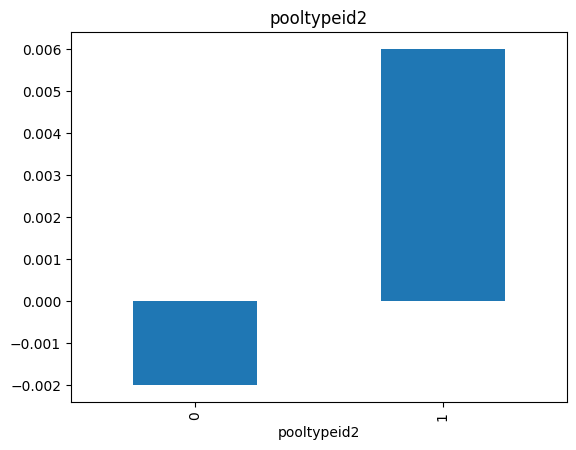

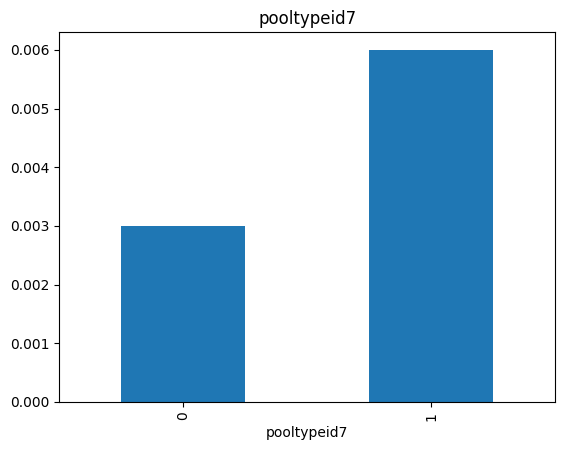

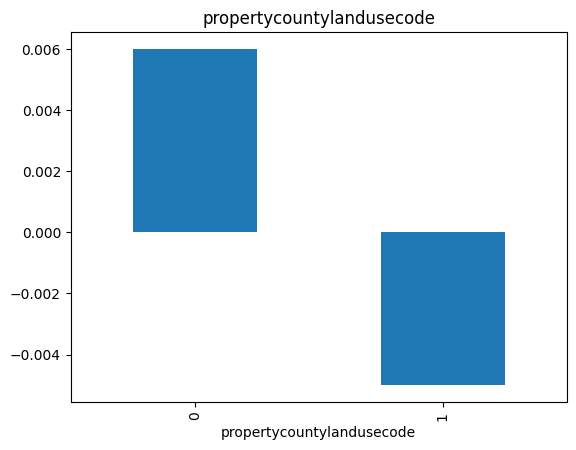

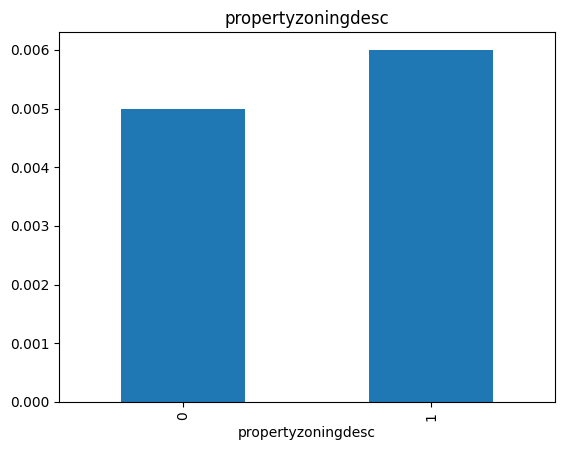

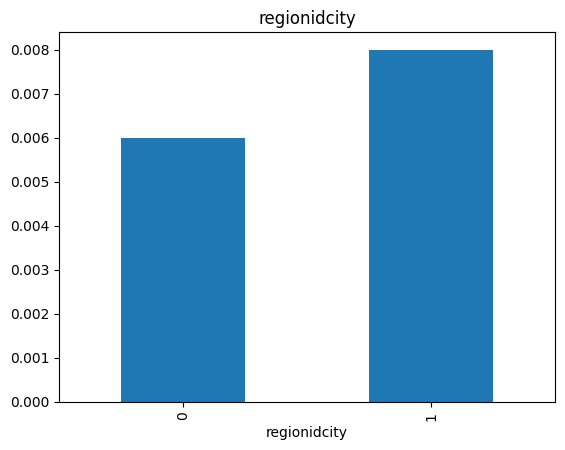

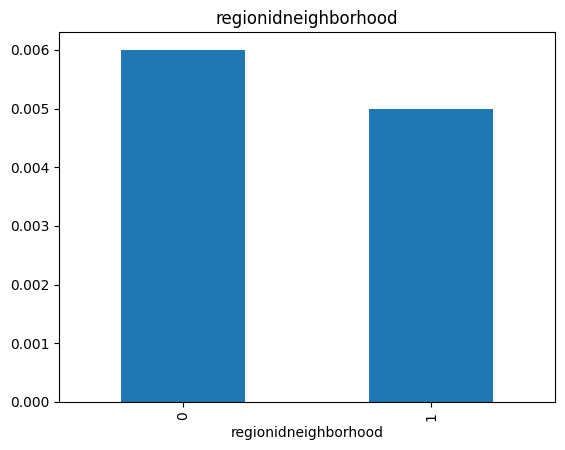

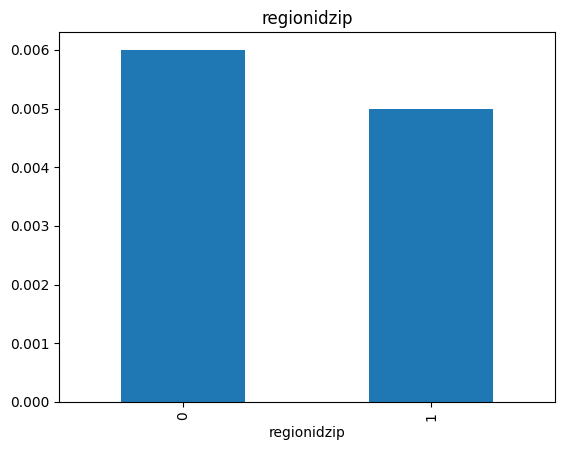

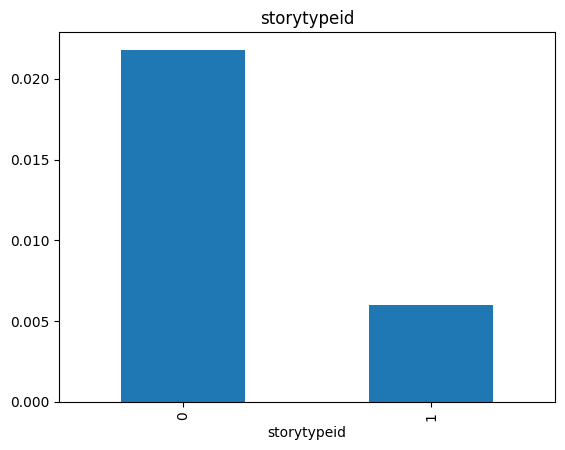

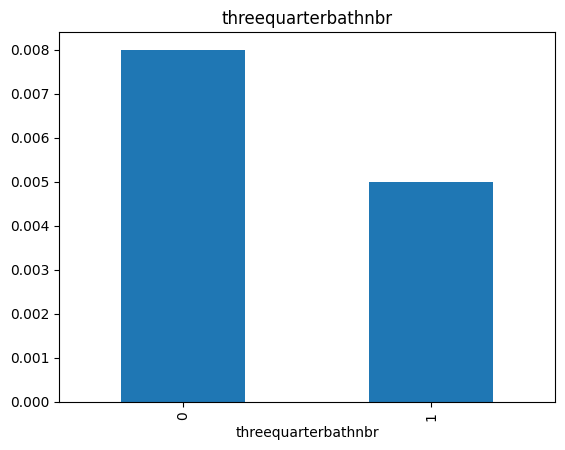

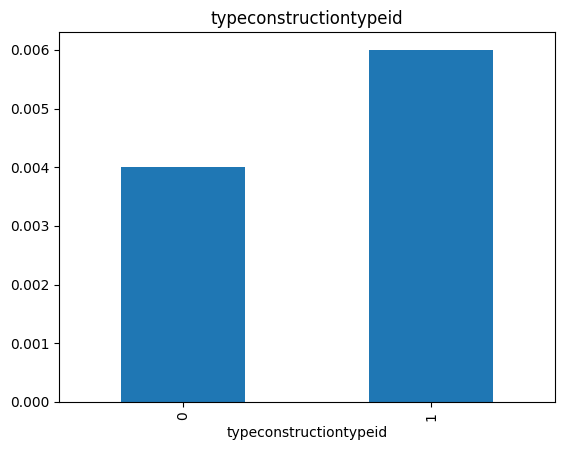

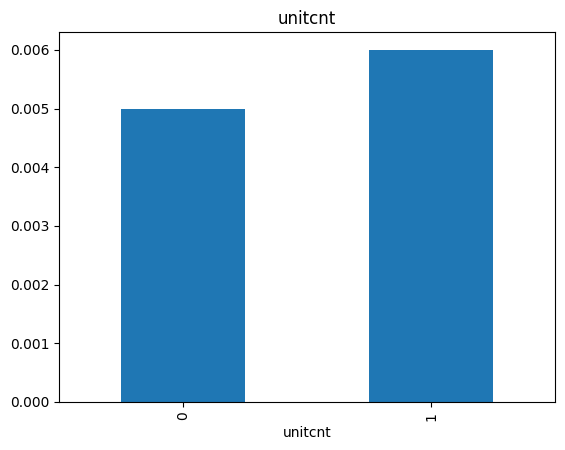

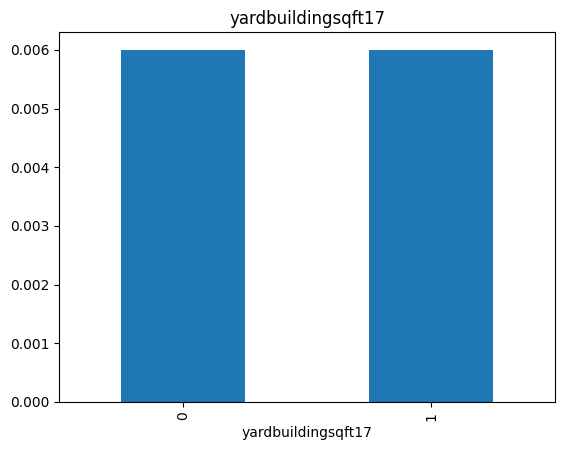

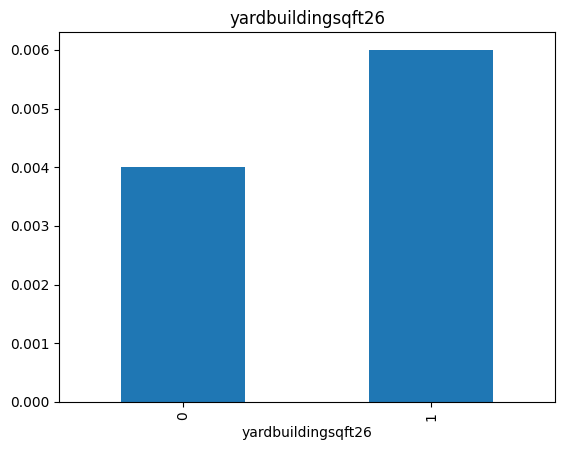

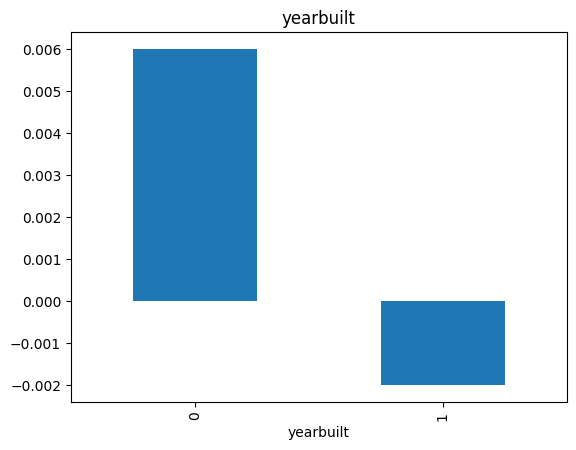

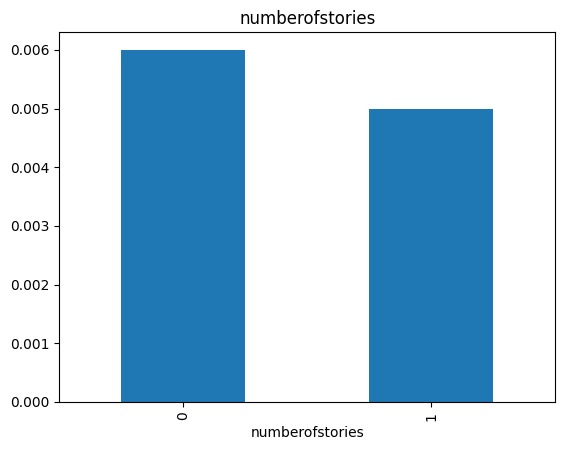

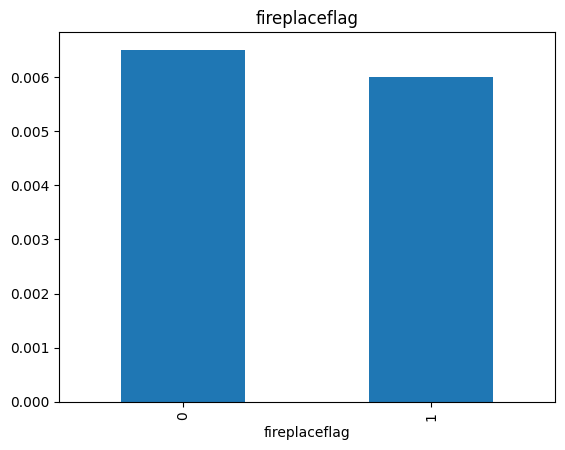

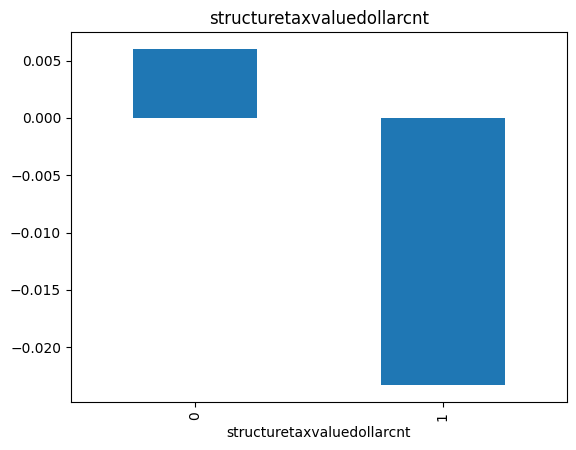

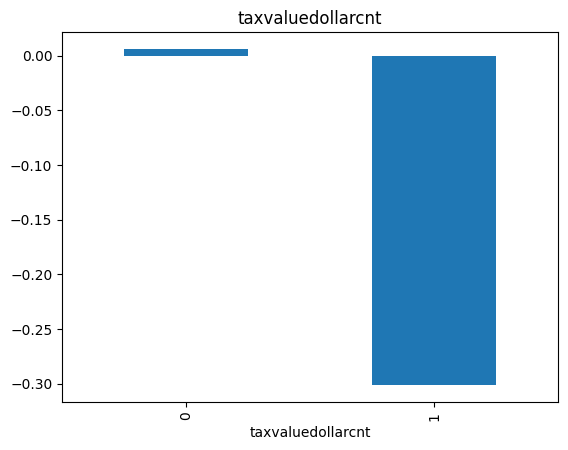

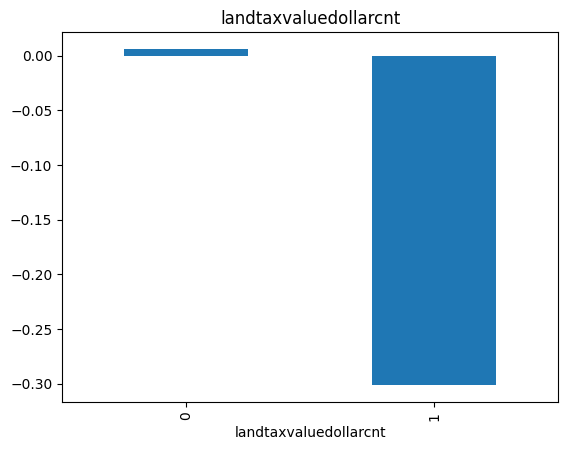

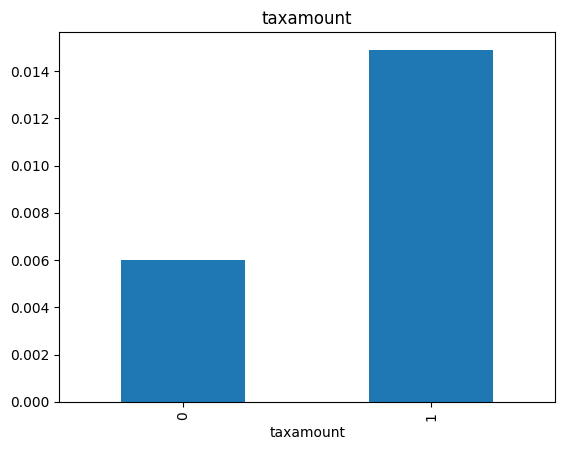

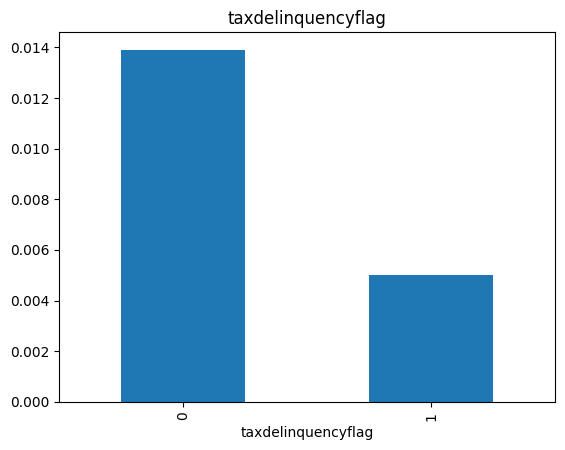

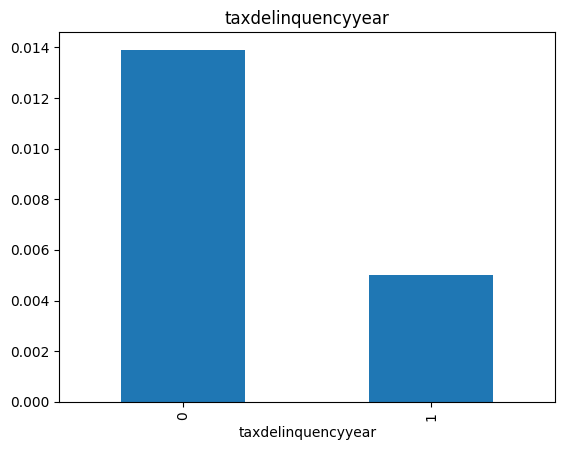

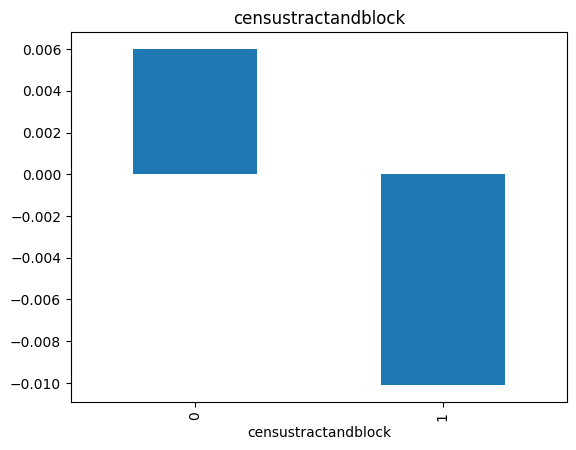

In [15]:
def analyze_missing_values(df, var):
    new_df = df.copy()
    new_df[var] = np.where(new_df[var].isnull(),1,0)
    new_df.groupby(var)['logerror'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in mis_val:
    analyze_missing_values(zillow_df, var)

In [16]:
print("Total no of variables with missing value in the dataset: ", len(mis_val))

Total no of variables with missing value in the dataset:  47


### Numerical variables:

In [17]:
num_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes!= 'O']
print("Total no of numerical variables in the dataset: ", len(num_vars))

Total no of numerical variables in the dataset:  54


In [18]:
zillow_df[num_vars].head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,265.0,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,6.111002e+13,0.0953
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,266.0,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,6.111002e+13,0.0198
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,261.0,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,NaN,6.111001e+13,0.0060
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,261.0,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,NaN,6.111001e+13,-0.0566
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,261.0,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,6.111001e+13,0.0573


### Categorical variables:

In [19]:
cat_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes == 'O']
print("Total no of categorical variables in the dataset: ", len(cat_vars))

Total no of categorical variables in the dataset:  6


In [20]:
zillow_df[cat_vars].head()

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag,transactiondate
0,NaN,1128,NaN,NaN,NaN,2016-01-27
1,NaN,1129,NaN,NaN,NaN,2016-03-30
2,NaN,1111,NaN,NaN,NaN,2016-05-27
3,NaN,1110,NaN,NaN,NaN,2016-06-07
4,NaN,1111,NaN,NaN,NaN,2016-08-08


### Cardinality of Categorical variables:

In [21]:
for var in cat_vars:
    print(var, len(zillow_df[var].unique()), " Categories")

hashottuborspa 2  Categories
propertycountylandusecode 78  Categories
propertyzoningdesc 1997  Categories
fireplaceflag 2  Categories
taxdelinquencyflag 2  Categories
transactiondate 352  Categories


In [22]:
def analyze_rare_labels(df, var, rare_perc):
    new_df = df.copy()
    # determine the % of observations per category
    tmp = new_df.groupby(var)['logerror'].count() / len(new_df)
    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than 1 % of the observations
for var in cat_vars:
    print(analyze_rare_labels(zillow_df, var, 0.01))
    print()

Series([], Name: logerror, dtype: float64)

propertycountylandusecode
0       0.000011
010     0.000011
0102    0.000033
0103    0.001108
0104    0.003855
          ...   
38      0.001174
6050    0.000011
73      0.000122
8800    0.000011
96      0.001152
Name: logerror, Length: 65, dtype: float64

propertyzoningdesc
1NR1*         0.000044
1NR3*         0.000033
AH RM-CD*     0.000089
AH RM-CD-F    0.000044
AH RS(3)10    0.000011
                ...   
WVRPD40000    0.000011
WVRPD4OOOO    0.000222
WVRPD56*      0.000033
WVRR          0.000022
WVRR1-RPD1    0.000100
Name: logerror, Length: 1988, dtype: float64

fireplaceflag
True    0.002459
Name: logerror, dtype: float64

Series([], Name: logerror, dtype: float64)

transactiondate
2016-01-01    0.000033
2016-01-02    0.000066
2016-01-03    0.000554
2016-01-04    0.002880
2016-01-05    0.003201
                ...   
2016-12-26    0.000166
2016-12-27    0.000565
2016-12-28    0.000864
2016-12-29    0.001296
2016-12-30    0.001041
Name:

### Temporal variables:

In [23]:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

### Relationship between temporal variables and log error:

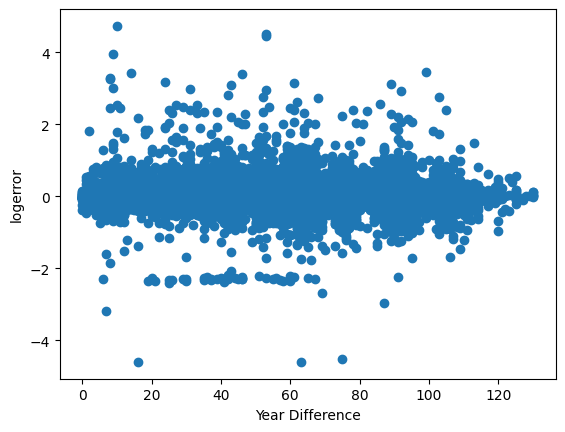

In [24]:
new_df = zillow_df.copy()
#calculate difference between year variable and year the house was sold
new_df[var] = new_df['assessmentyear'] - new_df['yearbuilt']    
plt.scatter(new_df[var],new_df['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('logerror')
plt.show()

### Discrete variables:

In [25]:
discrete_vars = [var for var in num_vars if len(zillow_df[var].unique())<20]
print('No of discrete variables : ', len(discrete_vars))

No of discrete variables :  26


In [26]:
zillow_df[discrete_vars].head()

,airconditioningtypeid,architecturalstyletypeid,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,decktypeid,finishedsquarefeet13,fips,fireplacecnt,fullbathcnt,garagecarcnt,heatingorsystemtypeid,poolcnt,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,regionidcounty,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,numberofstories,assessmentyear,taxdelinquencyyear
0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6111.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,265.0,2061.0,5.0,NaN,1.0,NaN,NaN,2.0,2015.0,NaN
1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6111.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,266.0,2061.0,4.0,NaN,NaN,NaN,NaN,1.0,2015.0,NaN
2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6111.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,5.0,NaN,NaN,NaN,NaN,1.0,2015.0,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6111.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,5.0,NaN,1.0,NaN,NaN,1.0,2015.0,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6111.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,261.0,2061.0,8.0,NaN,1.0,NaN,NaN,2.0,2015.0,NaN


### Continuous variables:

In [27]:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_var]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  27


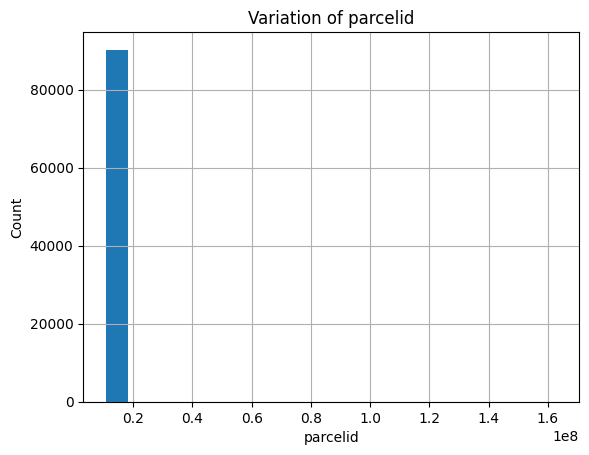

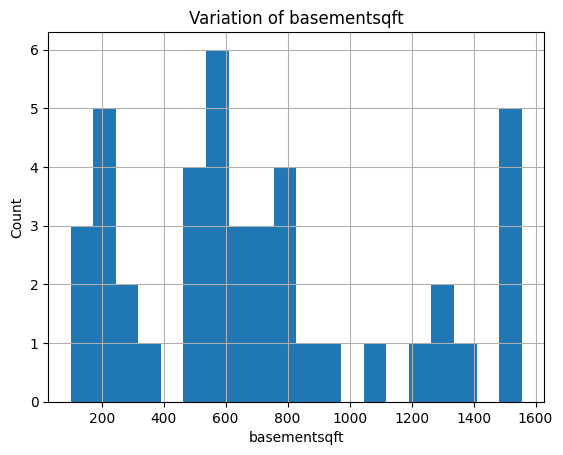

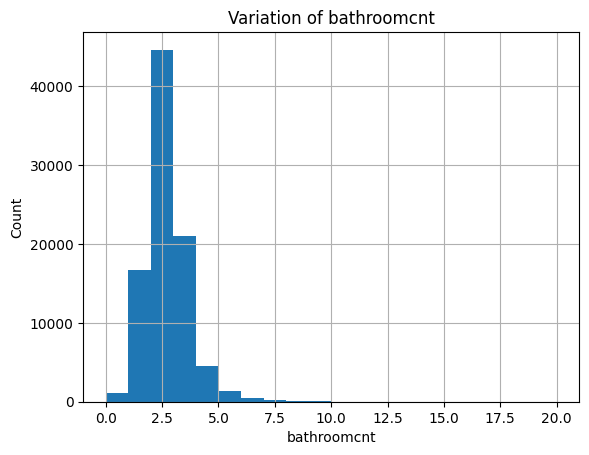

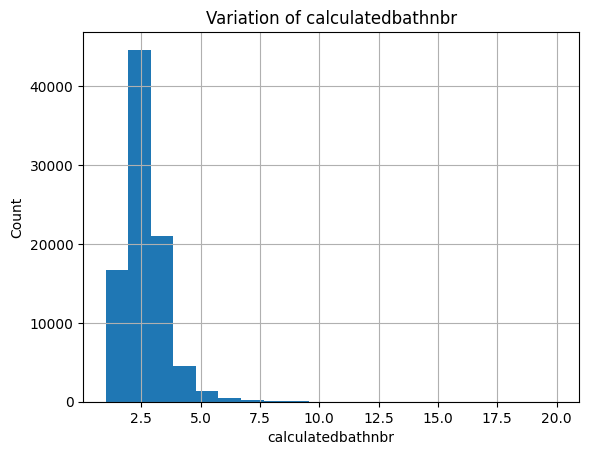

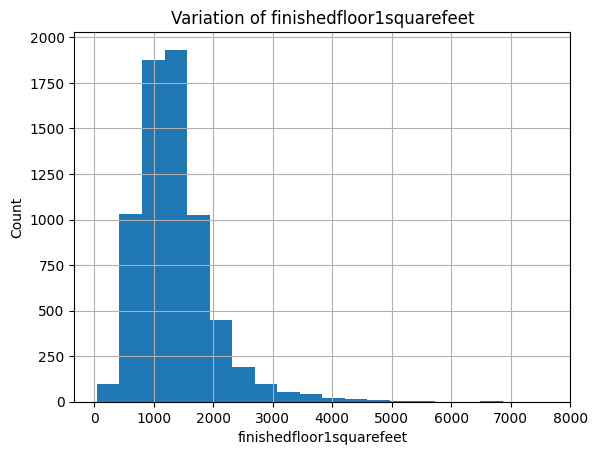

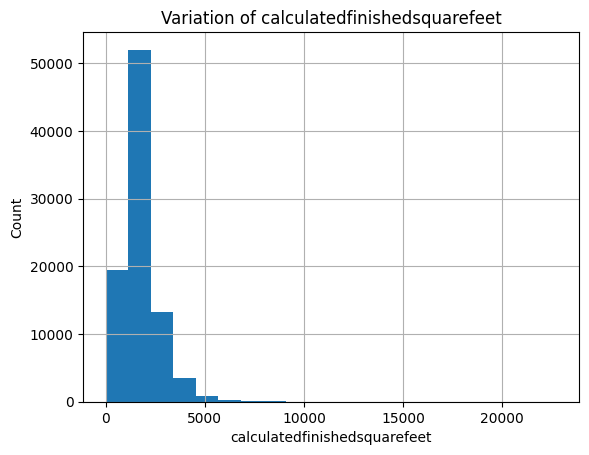

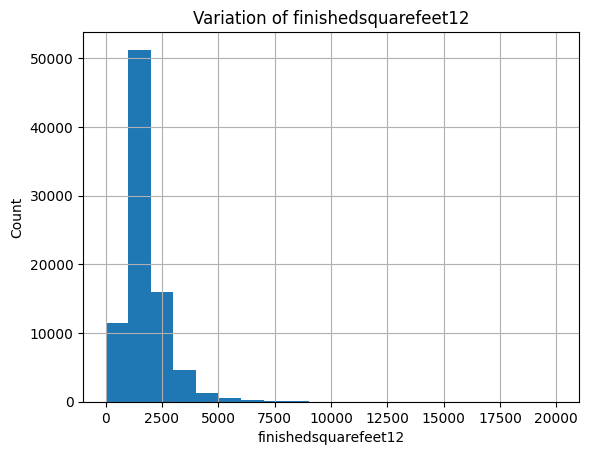

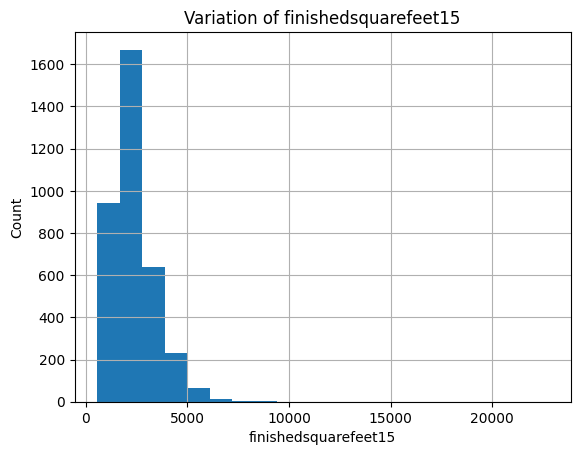

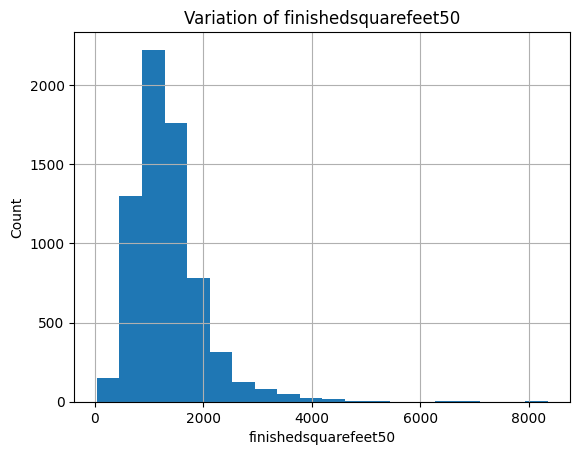

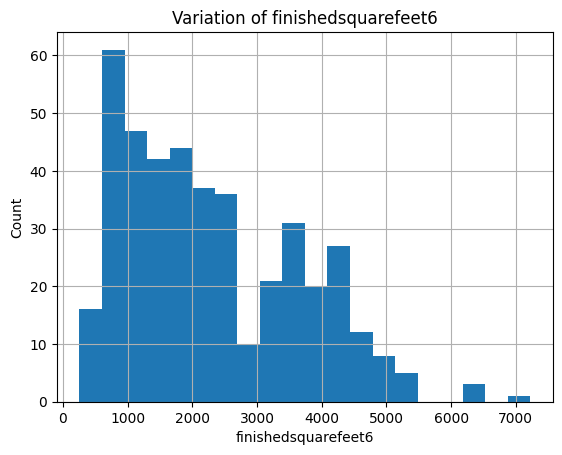

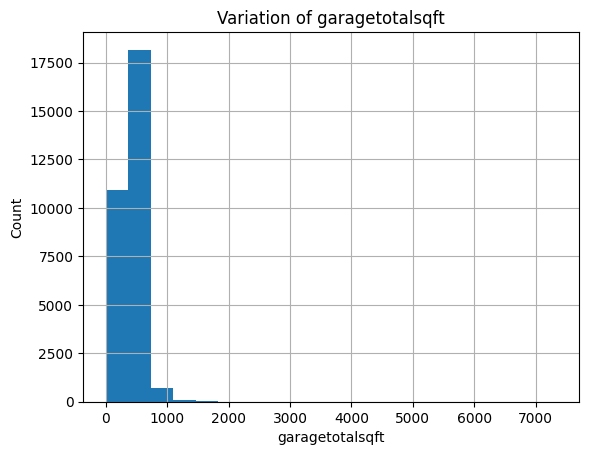

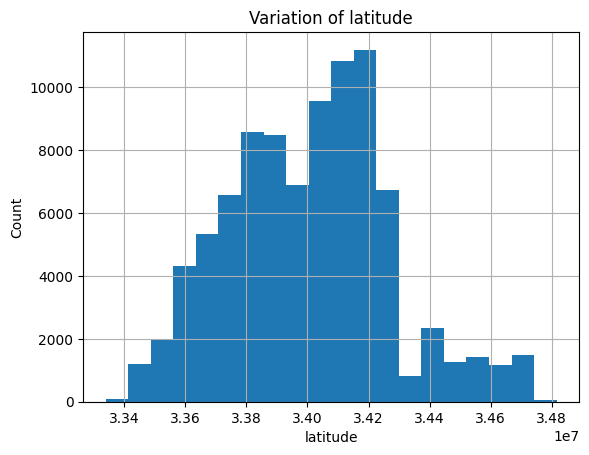

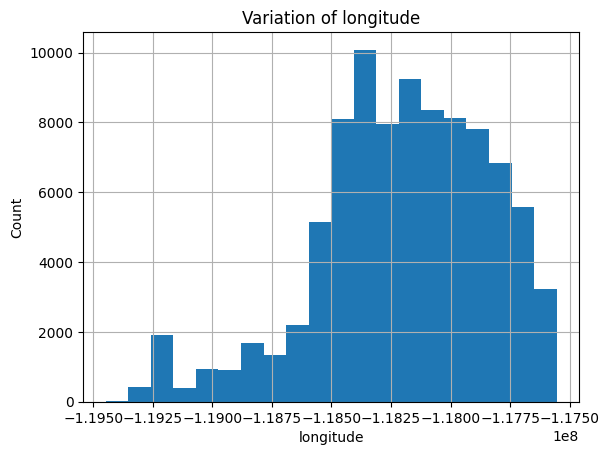

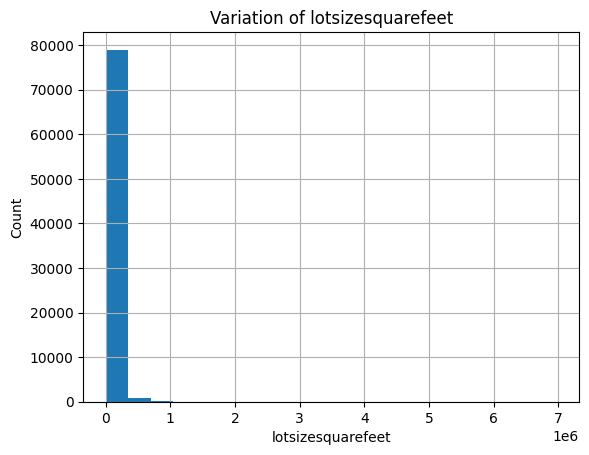

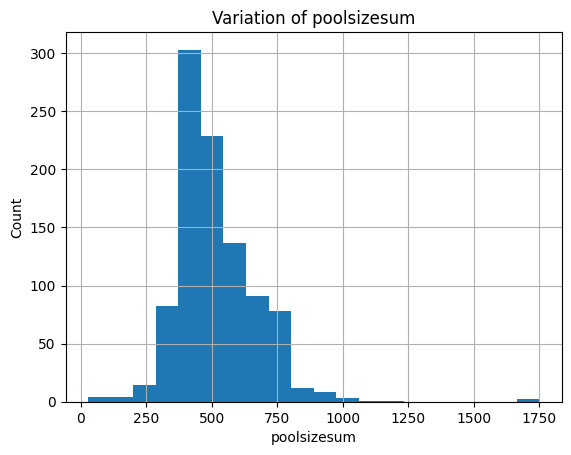

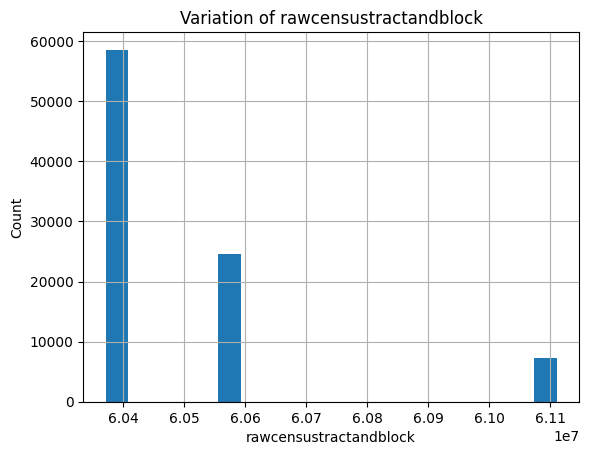

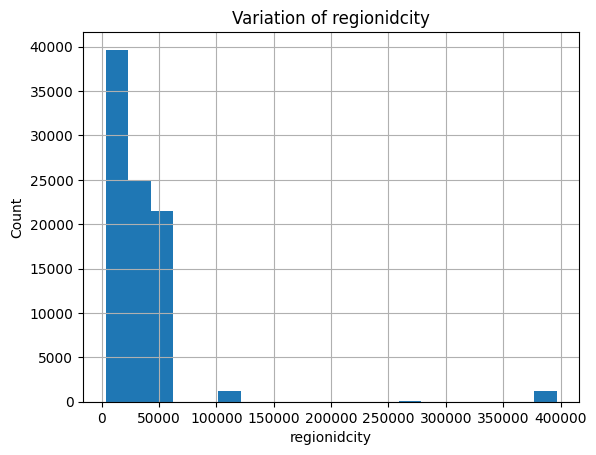

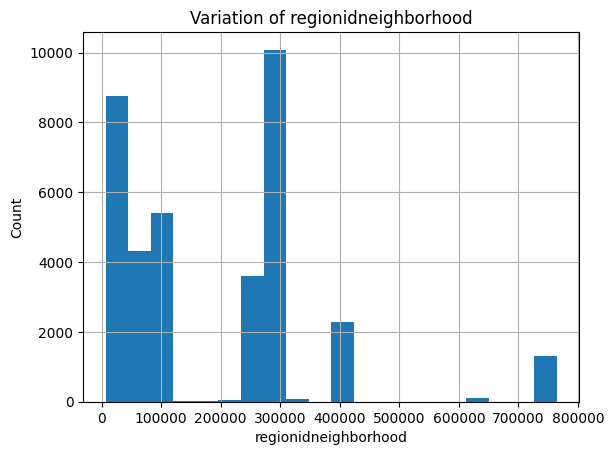

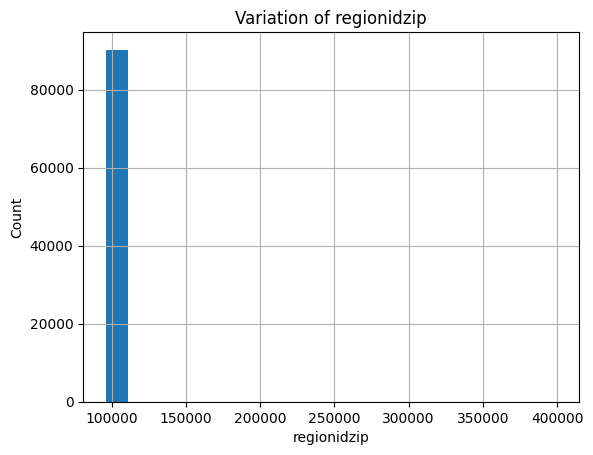

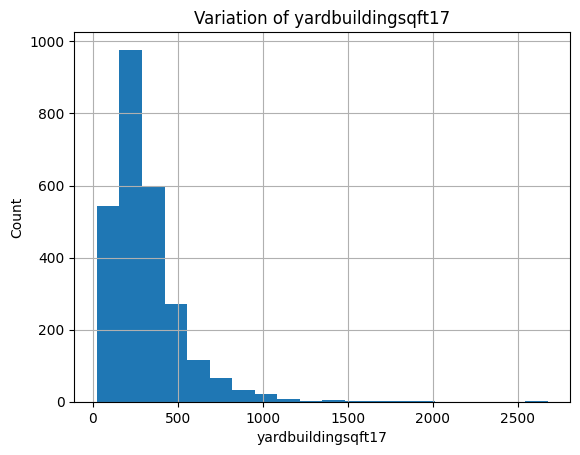

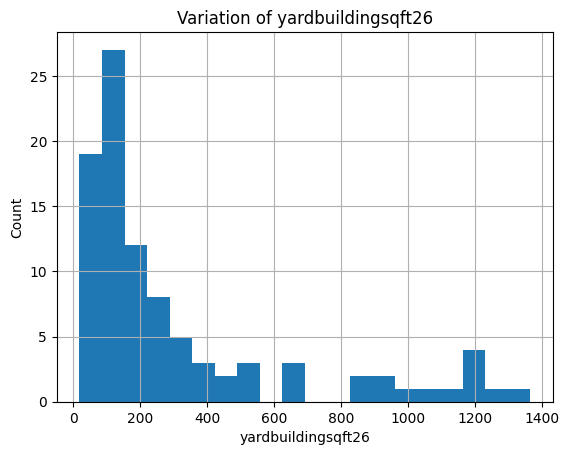

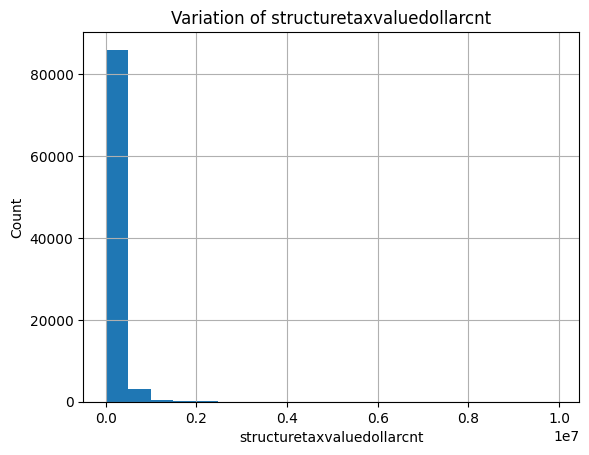

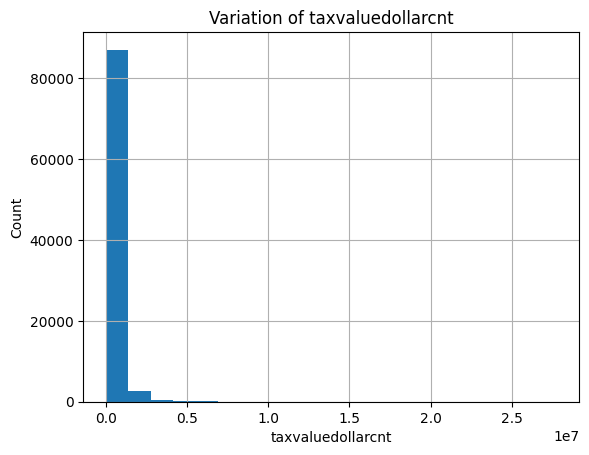

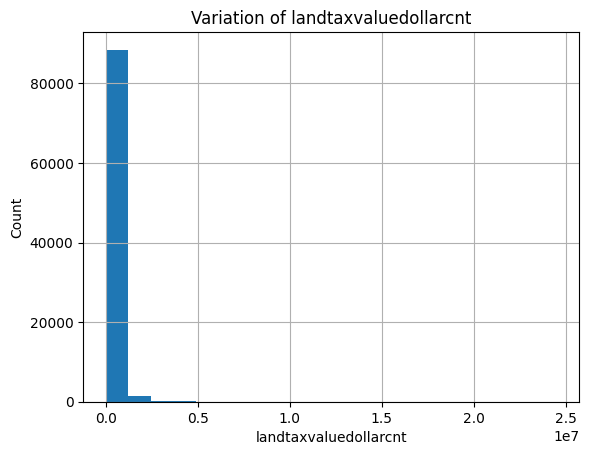

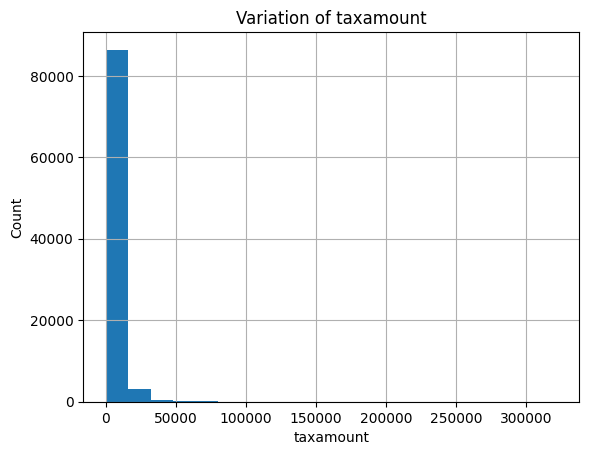

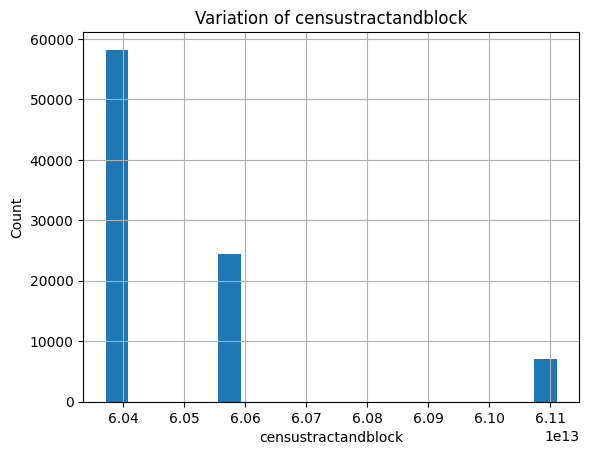

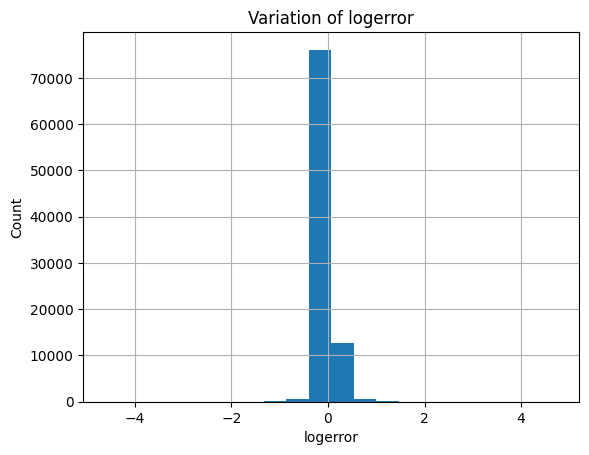

In [28]:
def analyze_cont_vars(df,var):
    
    new_df = zillow_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(zillow_df,var)

Some of the variables are not normally distributed.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

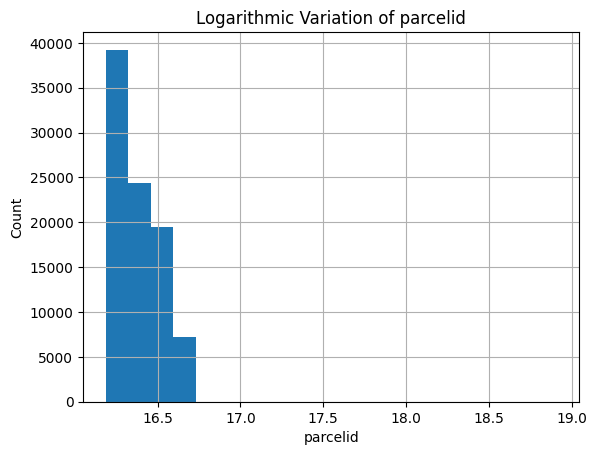

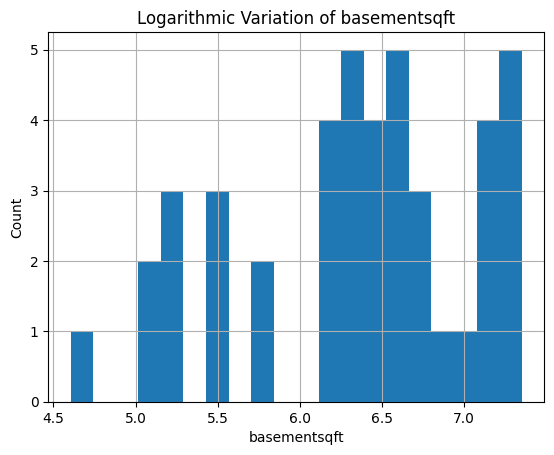

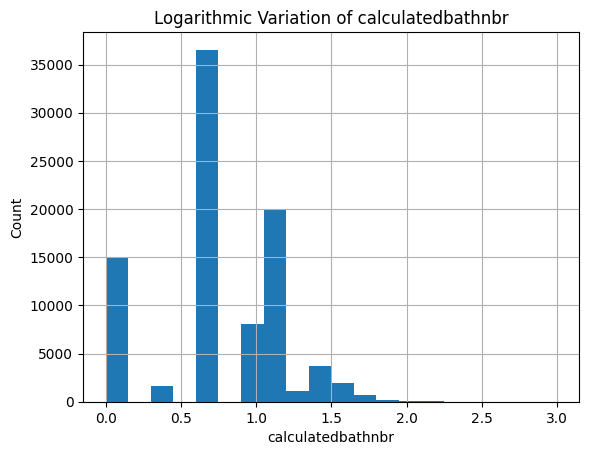

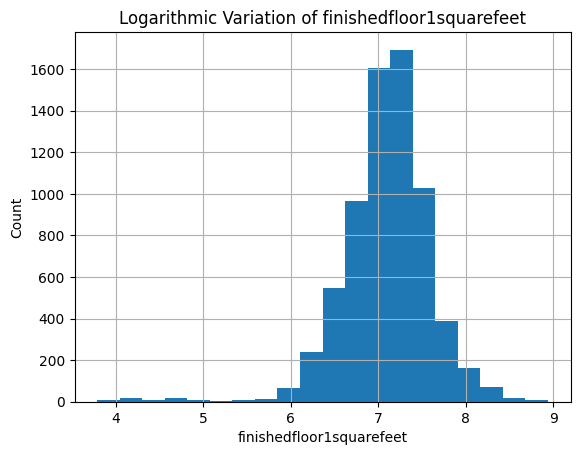

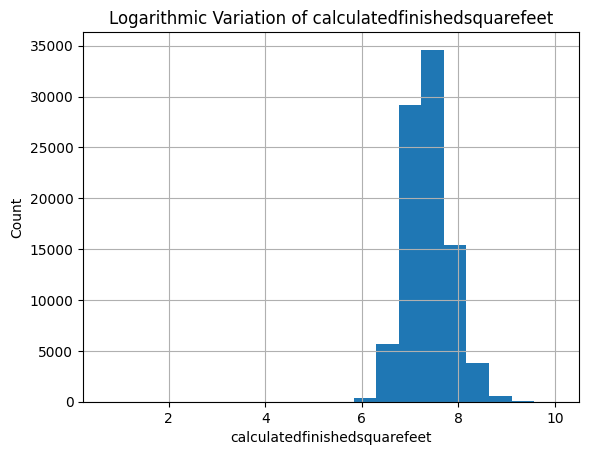

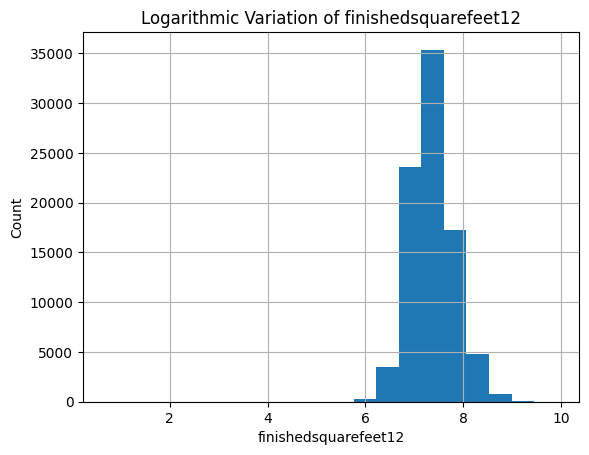

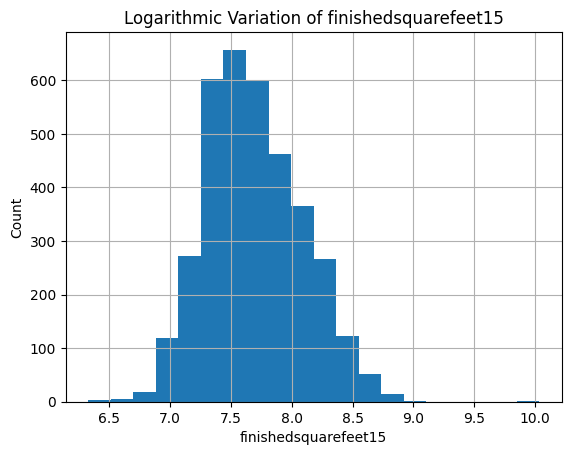

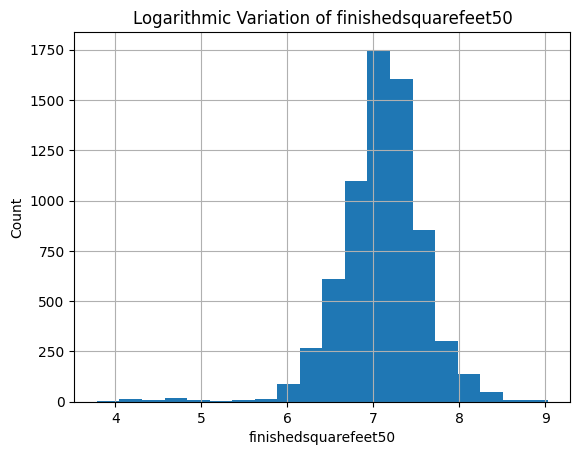

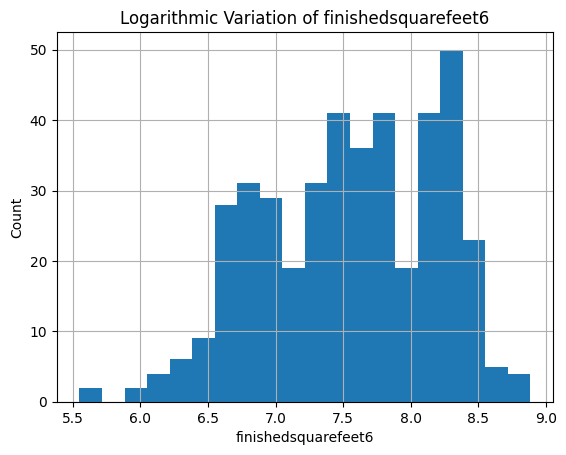

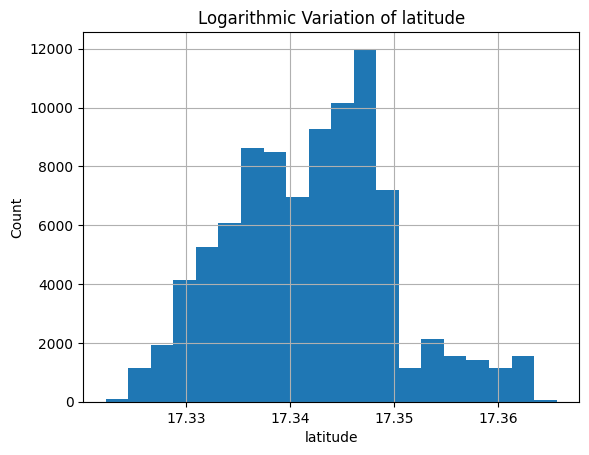

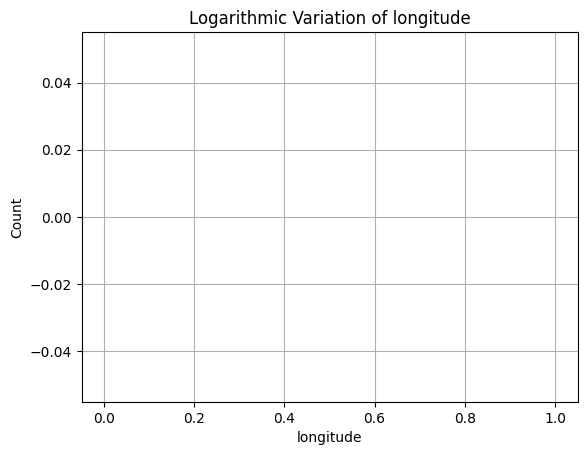

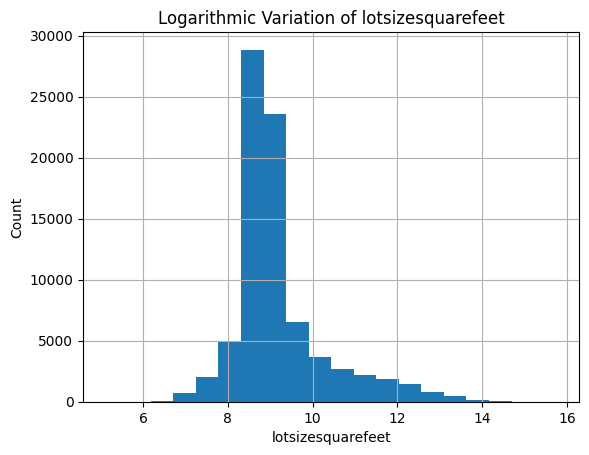

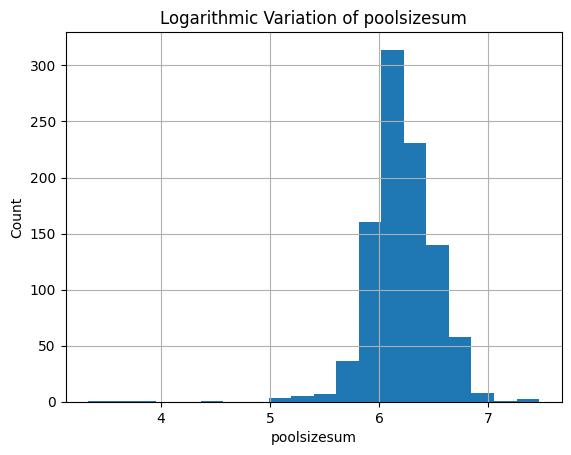

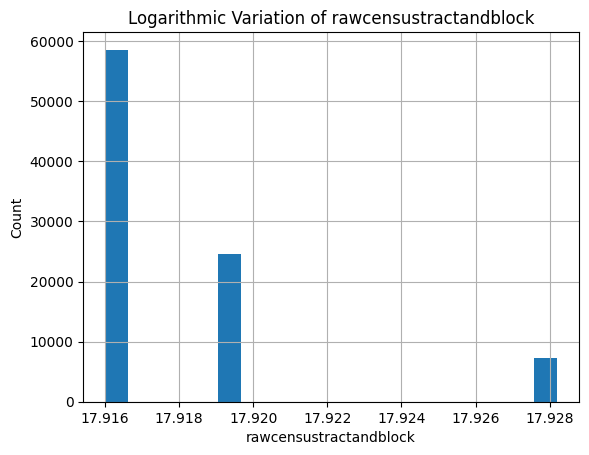

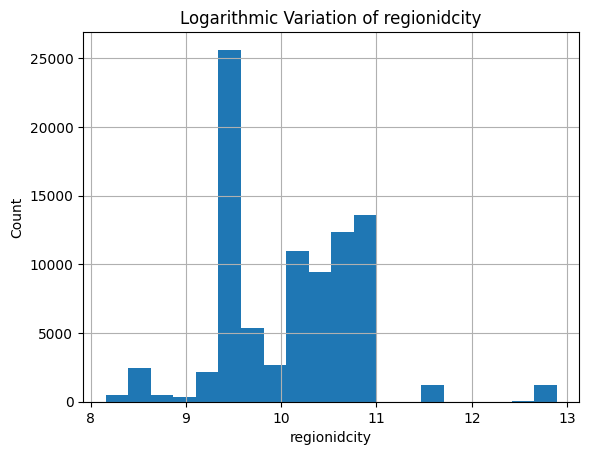

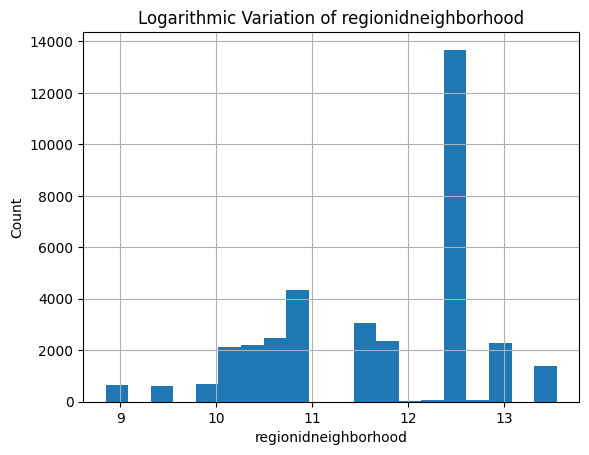

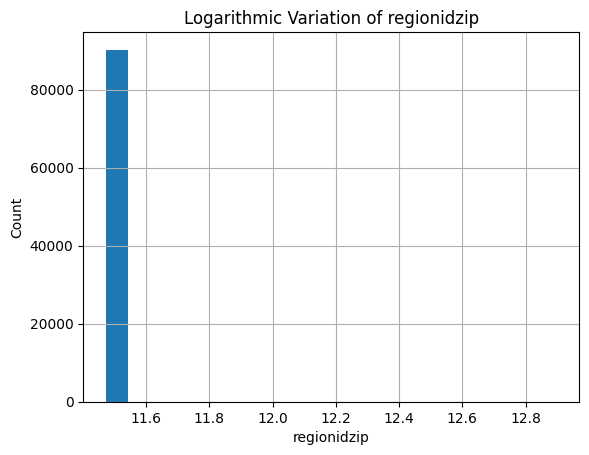

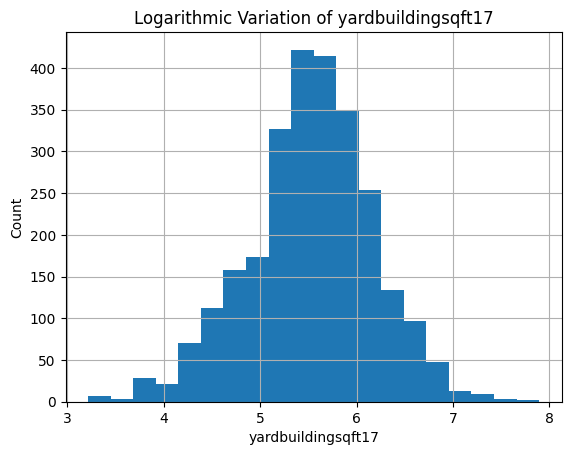

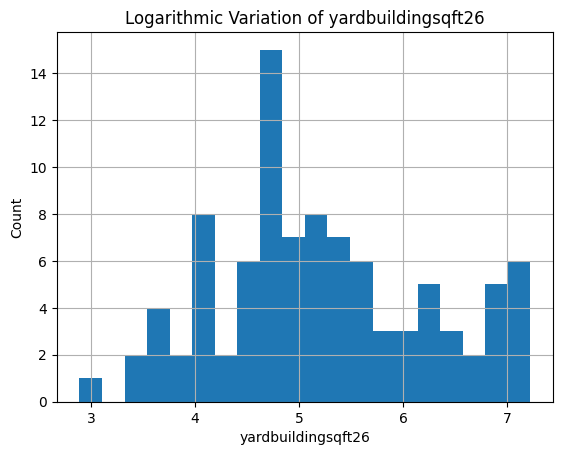

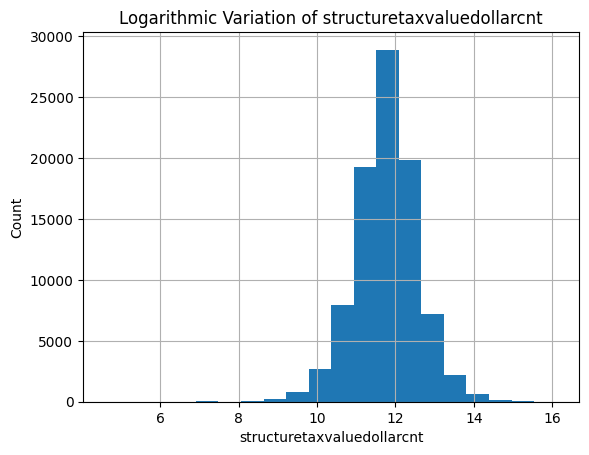

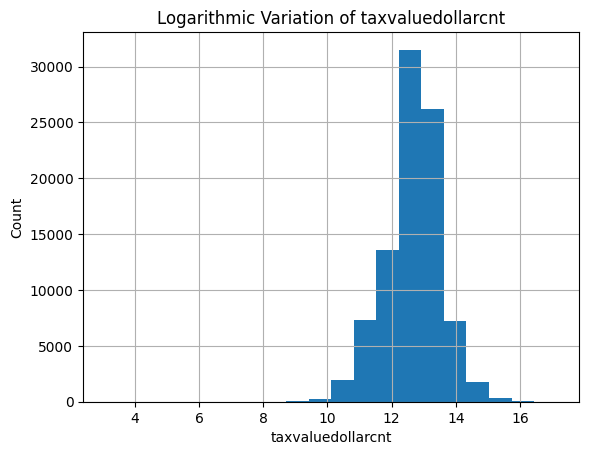

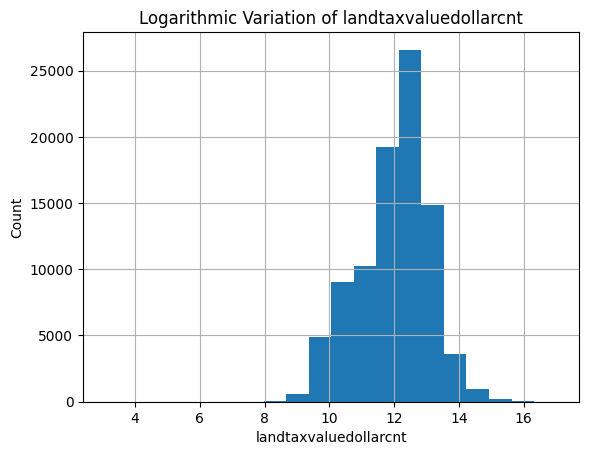

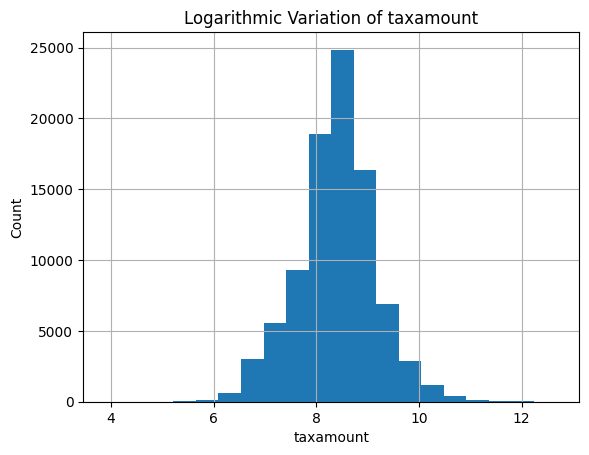

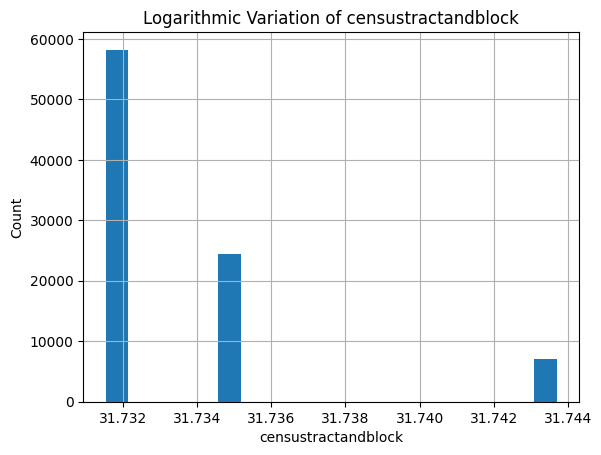

In [29]:
def analyze_log_variation(df,var):
    
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass
    else:
        #log Transformation of variables
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()
        
for var in cont_vars:
    analyze_log_variation(zillow_df,var)

We see that we get a better spread of the values for only few variables when we use the logarithmic transformation. 

### Analyzing Outliers:

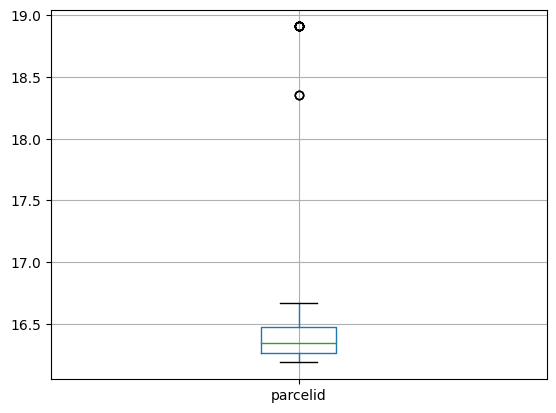

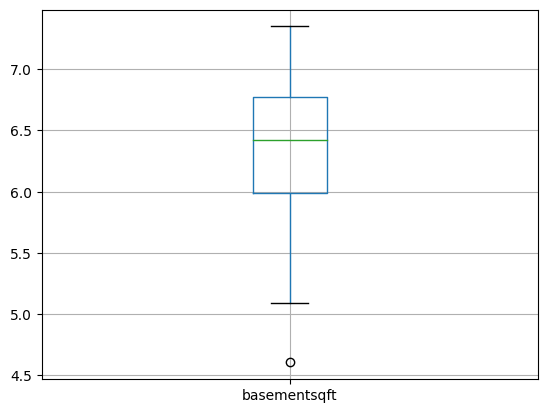

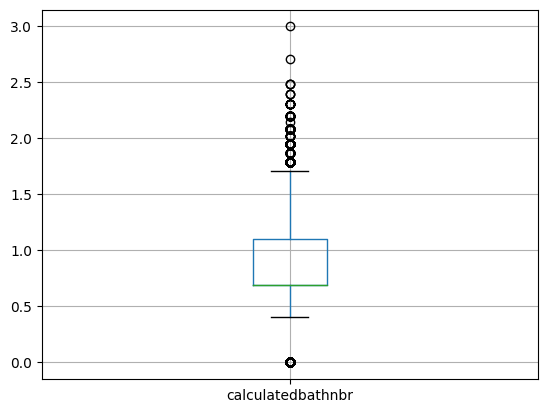

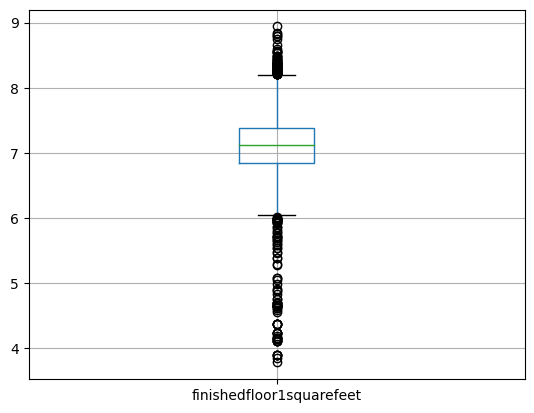

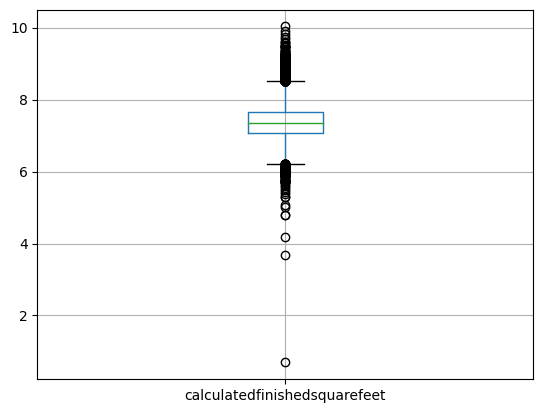

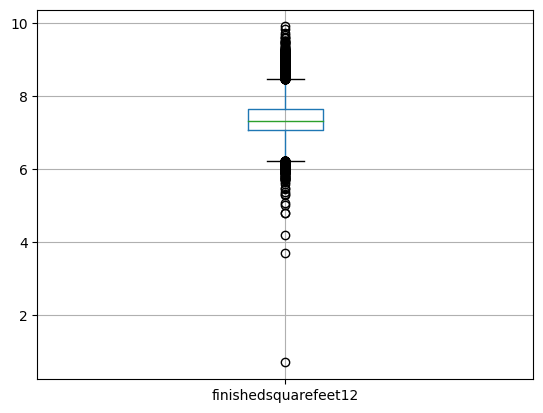

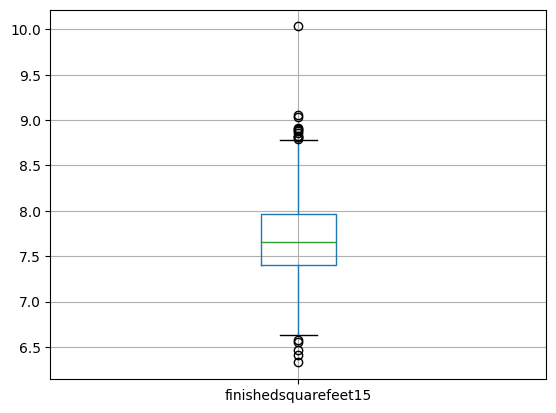

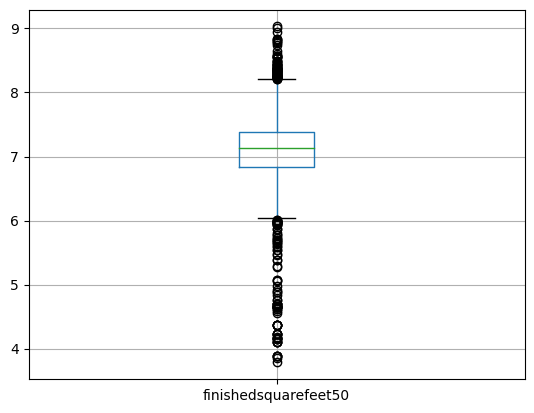

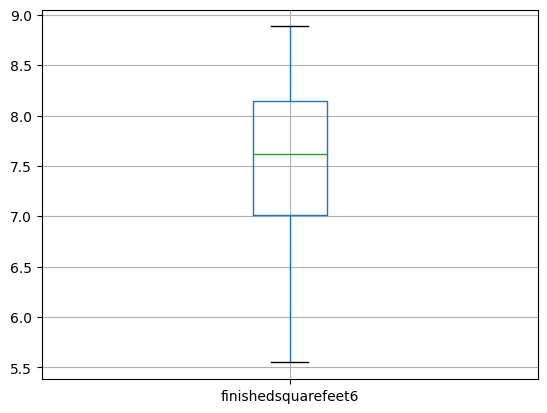

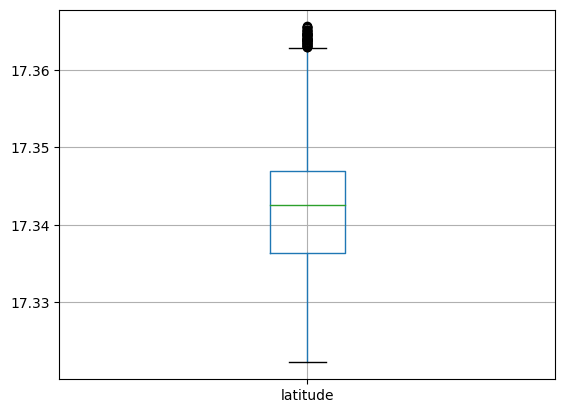

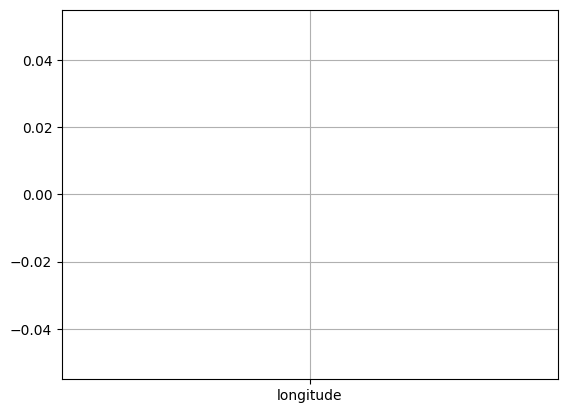

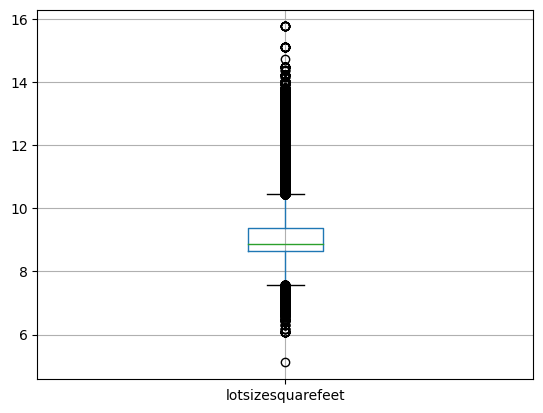

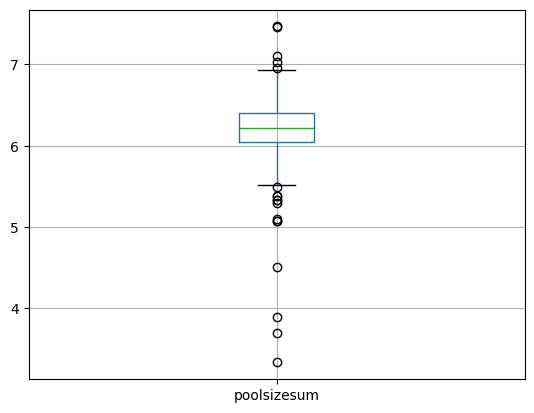

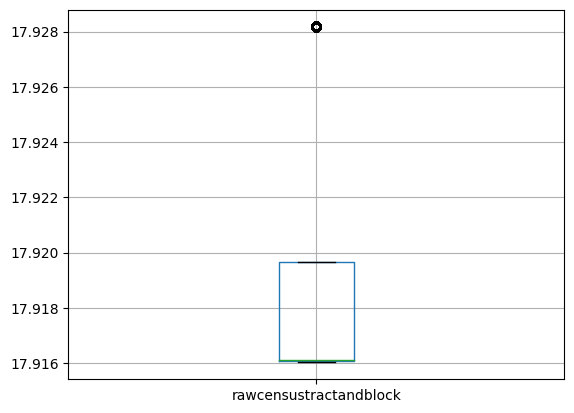

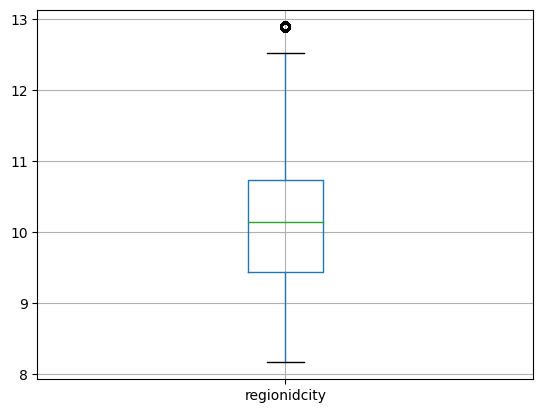

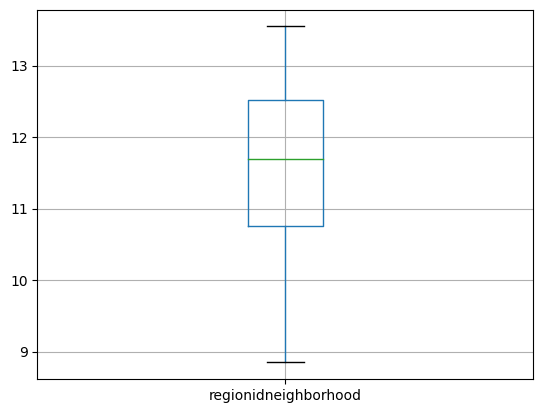

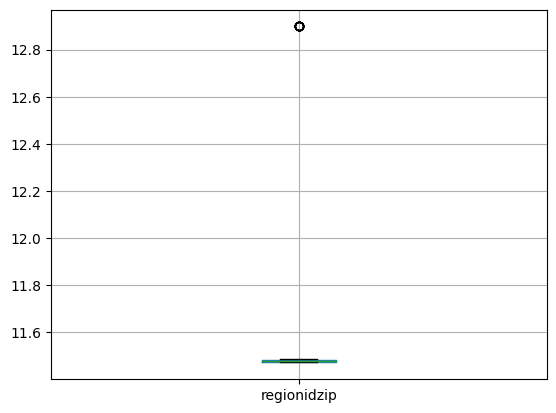

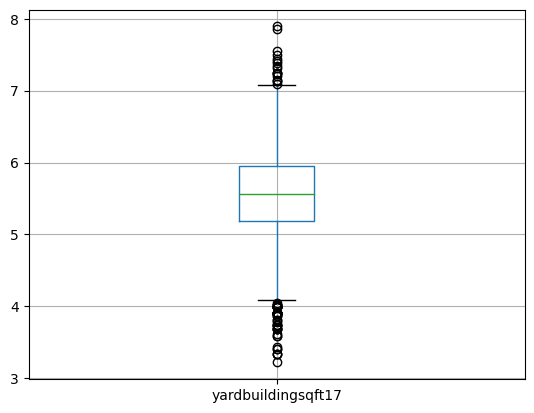

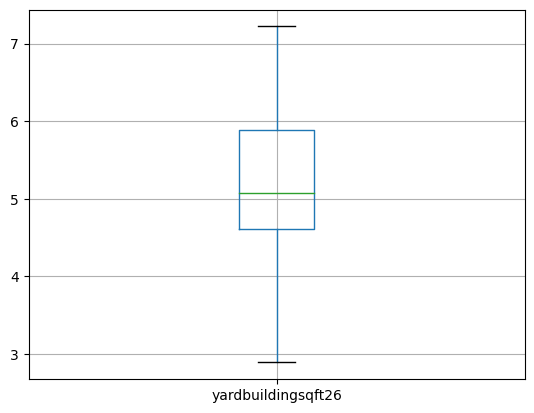

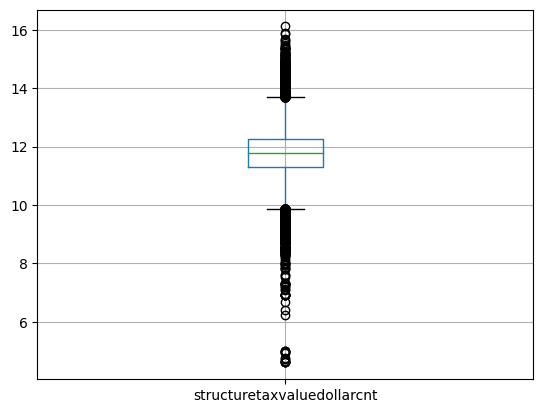

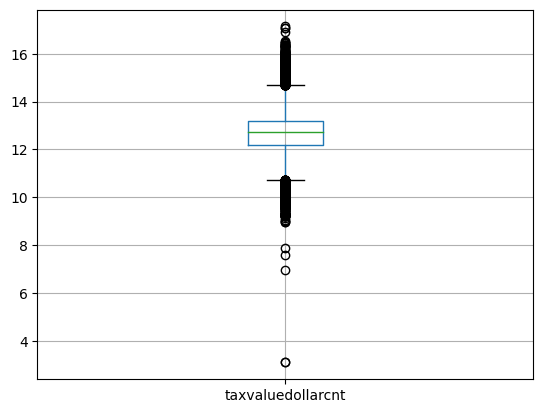

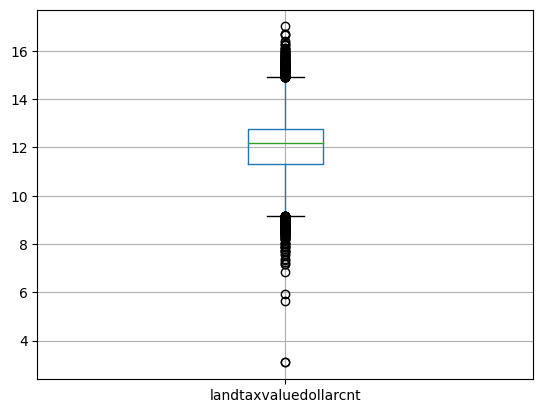

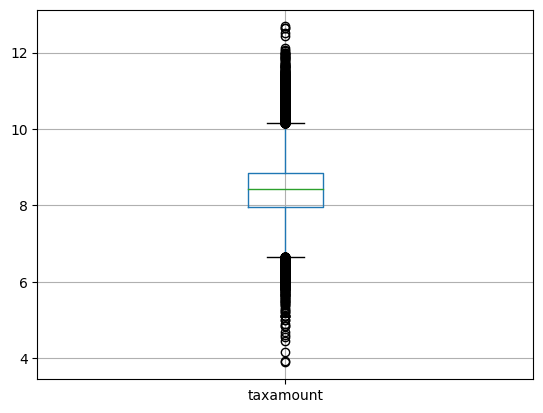

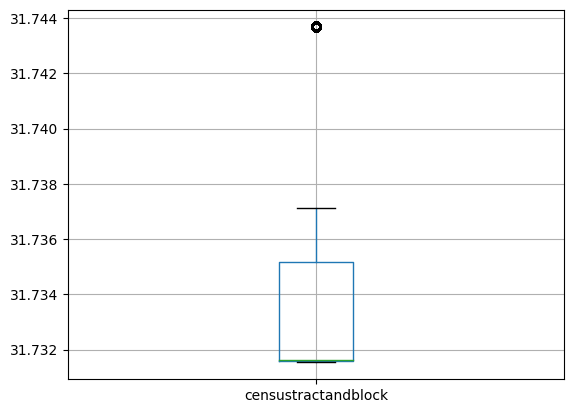

In [30]:
def analyze_outliers(df,var):
    
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.show()
        
for var in cont_vars:
    analyze_outliers(zillow_df,var)

### Save Dataset for Feature Engineering:

In [31]:
zillow_df.to_csv('zillow_initial_dataset.csv', index=False)